<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

##### **Notebook Structure**

<ol style="list-style-type: upper-roman;font-weight: bold;">
      <li><span style="font-weight: normal;"><a href="#DP_FeatureEng">Feature Engineering</a></span></li>
      <ol style="list-style-type:decimal;">
        <li><span style="font-weight: normal;"><a href="#most-used-feature-engineering-techniques">Bucketing</a></span></li>
        <li><span style="font-weight: normal;"><a href="#2-missing-values">Missing Values</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#categorical-variables-aproach">Categorical Variables Approach</a></span></li>
          <li><span style="font-weight: normal;"><a href="#fill-missing-values-with-central-tendency-measures">Fill Missing Values with Central Tendency Measures</a></span></li>
          <li><span style="font-weight: normal;"><a href="#knn-imputer">KNN Imputer</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#3-encoding">Categorical Variables (Encoding)</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#target-encoding">Target Encoding</a></span></li>
          <li><span style="font-weight: normal;"><a href="#label-ordinal-encoding">Label/Ordinal Encoding</a></span></li>
          <li><span style="font-weight: normal;"><a href="#one-hot-encoding">One-Hot Encoding</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#4-multicollinearity">Multicollinearity</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#variance-inflation-factor-vif">Variance Inflation Factor (VIF)</a></span></li>
        </ol>
      </ol>
      <li><span style="font-weight: normal;"><a href="#🎚️-feature-selection">Feature Selection</a></span></li>
      <ol style="list-style-type:decimal;">
        <li><span style="font-weight: normal;"><a href="#filter-methods">Filter Methods</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#correlation-coefficient">Spearman Correlations</a></span></li>
          <li><span style="font-weight: normal;"><a href="#chi-square-test">Chi-Square Test</a></span></li>
        </ol>
        <li><span style="font-weight: normal;"><a href="#wrapper-methods">Wrapper Methods</a></span></li>
        <ol style="list-style-type:lower-alpha;">
          <li><span style="font-weight: normal;"><a href="#recursive-feature-elimination-rfe">RFE (Recursive Feature Elimination)</a></span></li>
      </ol>
      <li><span style="font-weight: normal;"><a href="#embedded-methods">Embedded Methods</a></span></li>
      <ol style="list-style-type:lower-alpha;">
        <li><span style="font-weight: normal;"><a href="#ridge-regression-l2-regularization">Ridge Regression</a></span></li>
        <li><span style="font-weight: normal;"><a href="#lasso-regression-least-absolute-shrinkage-and-selection-operator">Lasso Regression</a></span></li>
      </ol>
    </ol>  
  </li>
</ol>

<br>

<div style="background: linear-gradient(to right,#08529C, #08529C); 
            padding: .7px; color: white; border-radius: 300px; text-align: center;">
</div>

## 📚 Libraries Import


In [11]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# Filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm                         # For progress bar

# embedded methods
from sklearn.linear_model import LassoCV, RidgeCV


# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# Disable FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

## 🧮 Import Databases

In [12]:
# Importing the dataset
train_data = pd.read_parquet('data/1stNotebook/train_data_cleaned.parquet')
test_data = pd.read_parquet('data/1stNotebook/test_data_cleaned.parquet')

In [13]:
# Display the first 2 rows of each dataset
train_data.head(2) 

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393875             2019-12-30             31                              N   
5393091             2019-08-30             46                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393875             2020-01-01                       N                 0.00   
5393091             2020-01-01                       Y              1745.93   

                  Birth Year   C-2 Date   C-3 Date  \
Claim Identifier                                     
5393875               1988.0 2019-12-31        NaT   
5393091               1973.0 2020-01-01 2020-01-14   

                                  Carrier Name Carrier Type County of Injury  \
Claim Identifier                                                               
5393875             NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE     ST. LAWRENCE   
5393091           ZURICH AMERICAN INSURANCE CO  1A. PRIVATE          WYOMING   

                 COVID-19 Indicator District Name First Hearing Date Gender  \
Claim Identifier                                                              
5393875                           N      SYRACUSE                NaT      M   
5393091                           N     ROCHESTER         2020-02-21      F   

                  IME-4 Count  Industry Code Industry Code Description  \
Claim Identifier                                                         
5393875                   NaN           44.0              RETAIL TRADE   
5393091                   4.0           23.0              CONSTRUCTION   

                 Medical Fee Region  WCIO Cause of Injury Code  \
Claim Identifier                                                 
5393875                           I                         27   
5393091                           I                         97   

                 WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
Claim Identifier                                                                
5393875              FROM LIQUID OR GREASE SPILLS                          10   
5393091                         REPETITIVE MOTION                          49   

                 WCIO Nature of Injury Description  WCIO Part Of Body Code  \
Claim Identifier                                                             
5393875                                  CONTUSION                      62   
5393091                             SPRAIN OR TEAR                      38   

                 WCIO Part Of Body Description Zip Code  Number of Dependents  \
Claim Identifier                                                                
5393875                               BUTTOCKS    13662                     1   
5393091                            SHOULDER(S)    14569                     4   

                  C-3 Date Binary  First Hearing Date Binary  \
Claim Identifier                                               
5393875                         1                          1   
5393091                         0                          0   

                  Birth Year Clean  Age at Injury Clean  Weekly Wage Reported  \
Claim Identifier                                                                
5393875                     1988.0                 31.0                     0   
5393091                     1973.0                 46.0                     1   

                  IME-4 Reported Carrier Type Bucket  \
Claim Identifier                                       
5393875                        0         1A. PRIVATE   
5393091                        1         1A. PRIVATE   

                 WCIO Cause of Injury Bucket WCIO Nature of Injury Bucket  \
Claim Identifier                                                            
5393875                             4 

In [14]:
test_data.head(2)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
6165911             2022-12-24             19                              N   
6166141             2022-11-20             19                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
6165911             2023-01-02                       N                  NaN   
6166141             2023-01-02                       N                  NaN   

                  Birth Year   C-2 Date C-3 Date               Carrier Name  \
Claim Identifier                                                              
6165911               2003.0 2023-01-02      NaT  INDEMNITY INSURANCE CO OF   
6166141               2003.0 2023-01-02      NaT    A I U INSURANCE COMPANY   

                 Carrier Type County of Injury COVID-19 Indicator  \
Claim Identifier                                                    
6165911           1A. PRIVATE            BRONX                  N   
6166141           1A. PRIVATE           QUEENS                  N   

                 District Name First Hearing Date Gender  IME-4 Count  \
Claim Identifier                                                        
6165911                    NYC                NaT      M          NaN   
6166141                    NYC                NaT      F          NaN   

                  Industry Code       Industry Code Description  \
Claim Identifier                                                  
6165911                    48.0  TRANSPORTATION AND WAREHOUSING   
6166141                    45.0                    RETAIL TRADE   

                 Medical Fee Region  WCIO Cause of Injury Code  \
Claim Identifier                                                 
6165911                          IV                         31   
6166141                          IV                         75   

                 WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
Claim Identifier                                                                
6165911                   FALL, SLIP OR TRIP, NOC                          10   
6166141                  FALLING OR FLYING OBJECT                          10   

                 WCIO Nature of Injury Description  WCIO Part Of Body Code  \
Claim Identifier                                                             
6165911                                  CONTUSION                      54   
6166141                                  CONTUSION                      10   

                 WCIO Part Of Body Description Zip Code  Number of Dependents  \
Claim Identifier                                                                
6165911                              LOWER LEG    10466                     1   
6166141                   MULTIPLE HEAD INJURY    11691                     1   

                  C-3 Date Binary  First Hearing Date Binary  \
Claim Identifier                                               
6165911                         1                          1   
6166141                         1                          1   

                  Birth Year Clean  Age at Injury Clean  Weekly Wage Reported  \
Claim Identifier                                                                
6165911                     2003.0                 19.0                     0   
6166141                     2003.0                 19.0                     0   

                  IME-4 Reported Carrier Type Bucket  \
Claim Identifier                                       
6165911                        0         1A. PRIVATE   
6166141                        0         1A. PRIVATE   

                 WCIO Cause of Injury Bucket WCIO Nature of Injury Bucket  \
Claim Identifier                                                            
6165911                           

# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>2 | Data Preparation</b></h1></center>
</div>

<br><br>

### **🛠️ Drop Columns Unnecessary for the Model**

In [15]:
train_data[train_data.columns.sort_values()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 5393875 to 6165075
Data columns (total 59 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Accident Date Day                  570337 non-null  float64       
 2   Accident Date Month                570337 non-null  float64       
 3   Accident Date Weekday              570337 non-null  float64       
 4   Accident Date Year                 570337 non-null  float64       
 5   Age at Injury                      574026 non-null  int64         
 6   Age at Injury Clean                571840 non-null  float64       
 7   Alternative Dispute Resolution     574026 non-null  object        
 8   Assembly Date                      574026 non-null  datetime64[ns]
 9   Assembly Date Day                  574026 non-null  int32         
 10  Assembly Date Mont

In [16]:
# Drop the Dates columns
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date'] # Because we have all extracted columns from it

# Drop the columns based on Correlation Analysis [1st Notebook]
columns_to_drop = ['Age at Injury',    # Because we have Age at Injury Cleaned
                   'Birth Year',       # Because we have Age at Injury Cleaned [It's redundant]
                   'Birth Year Clean', # Because we have Age at Injury Cleaned [It's redundant]
                   'Average Weekly Wage', # Because we create a new column from it ['Weekly Wage Reported']
                   'Carrier Name',     # Because we don't know how to treat text for now
                   'Carrier Type',     # Because we create a new column from it ['Carrier Type Bucket']
                   'IME-4 Count',      # Because we create a new column from it ['IME-4 Reported']
                   'Industry Code Description',  # Because we have 'Industry Code'
                   'Zip Code',          # Because we have 'Medical Fee Region' [It's redundant]
                   'WCIO Cause of Injury Description',  # Because we have 'WCIO Cause of Injury Bucket'
                   'WCIO Cause of Injury Code',         # Because we have 'WCIO Cause of Injury Bucket'
                   'WCIO Part Of Body Description',     # Because we have 'WCIO Part of Body Bucket'
                   'WCIO Part Of Body Code',            # Because we have 'WCIO Part of Body Bucket'
                   'WCIO Nature of Injury Description', # Because we have 'WCIO Nature of Injury Bucket'
                   'WCIO Nature of Injury Code',        # Because we have 'WCIO Nature of Injury Bucket'

                   # Dates columns that we don't need
                   'C-3 Date Year', 'C-3 Date Month', 'C-3 Date Day', 'C-3 Date Weekday',
                   'First Hearing Date Year', 'First Hearing Date Month', 'First Hearing Date Day', 'First Hearing Date Weekday'
]

train_data = train_data.drop(columns = date_columns + columns_to_drop)
test_data = test_data.drop(columns = date_columns + columns_to_drop)

In [17]:
# Show the columns of the training set (train_data) that have missing values and are 'object' type
train_data.select_dtypes(include = 'object').columns[train_data.select_dtypes(include = 'object').isnull().any()]

Index([], dtype='object')

> Since our approach to the **`NA's`** of categorical variables is to replace them with a new category, it is confirmed that no variable currently has **`NA's`**.

In [18]:
# Show the columns of the training set 'object' type
train_data.select_dtypes(include = 'object').columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type Bucket',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket', 'Claim Injury Type'],
      dtype='object')

> For **`object`** type variables, we will use some **Enconding** techniques to transform them into **numerical** variables, since the model does not accept **`object`** type variables.

---

### ⚖️ **Training/Validation Division**

> Before starting the feature engineering process that will be carried out in the next steps, we will divide the training data into training and validation sets. This will allow us to evaluate the performance of the models we will develop.

In [19]:
# Splitting the data into training and validation sets
X = train_data.drop(columns = ['Claim Injury Type'])
y = train_data['Claim Injury Type']
X_train, X_val, y_train, y_val = train_test_split(X,y,                 # X and y
                                                  test_size = 0.25,    # 75% train, 25% validation
                                                  random_state = 2024, # Seed
                                                  stratify = y,        # Keep the same proportion of target classes (because of imbalance)
                                                  shuffle = True)      # Shuffle the data

In [20]:
# Check the shape of the training and validation sets
X_train.shape, X_val.shape

((430519, 30), (143507, 30))

In [21]:
# Check the columns of the training set (X_train) that are not in the validation set (X_val)
set(X_train.columns) - set(X_val.columns) # Perfect!

set()

In [22]:
# Check the information of the training set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430519 entries, 6094685 to 5635719
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Alternative Dispute Resolution  430519 non-null  object 
 1   Attorney/Representative         430519 non-null  object 
 2   County of Injury                430519 non-null  object 
 3   COVID-19 Indicator              430519 non-null  object 
 4   District Name                   430519 non-null  object 
 5   Gender                          430519 non-null  object 
 6   Industry Code                   423065 non-null  float64
 7   Medical Fee Region              430519 non-null  object 
 8   Number of Dependents            430519 non-null  int64  
 9   C-3 Date Binary                 430519 non-null  int32  
 10  First Hearing Date Binary       430519 non-null  int32  
 11  Age at Injury Clean             428886 non-null  float64
 12  Weekly Wage Re

In [23]:
# Show the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().any()]

Index(['Industry Code', 'Age at Injury Clean', 'Accident Date Year',
       'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday',
       'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

> Since we have missing values in the dataset, we will need to use some technique to fill in on next steps.

---

### <a class='anchor' id='DP_FeatureEng'></a> 🛠️ **Feature Engineering**

##### **Most Used Feature Engineering Techniques**

+ **Binning / Bucketizing** ✅    
  - Grouping of values into "bins" or "buckets"
  
<br>

1. **Splitting the Data** ✅
    - Training Data
    - Validation Data

2. **Handling Missing Values**
    - Drop Missing Values
    - Impute Missing Values (e.g., using some statistical measure, KNN, etc.)

3. **Encoding**
    - Label Encoding using Scikit-learn
    - One-Hot Encoding using Scikit-learn

4. **Multicollinearity**
    - Variance Inflation Factor (VIF)
  
5. **Normalize / Standardize** <sup>*</sup> [We will do it on the next notebook] - [3. Modeling&Evaluation]('./3_Modeling&Evaluation_MLProject_Group33.ipynb')
    - Normalize and Standardize using Scikit-learn

<br>

<sup><b>*</b></sup>
**Note:** We will **Normalize / Standardize** the data in the next notebook, since that will create more datasets to work with. It is better to do it after the **Feature Engineering** process.



---

#### **2 | Handling Missing Values** <a class='anchor' id='2-missing-values'></a>

**`Industry Code`**
   - **Chosen Strategy**: Replace with **NaN** (new category)
   - **Reasoning**: For categorical variables like "Industry Code," we decided to replace missing values with a new category (NaN). This approach allows the model to learn from the absence of data, which can be informative in itself. This approach avoids losing information and is simple to implement.
  
**`Accident Date Day, Month, Weekday, Year`**
   - **Chosen Strategy**: **Median Imputation**
   - **Reasoning**: Each of these variables has a low percentage of missing values ($\approx0.63\%$), so using the median for imputation is both simple and effective. Median imputation is robust to outliers and provides a reasonable estimate without adding complexity.
  
**`C-2 Date Day, Month, Weekday, Year`**
   - **Chosen Strategy**: **KNN Imputation**
   - **Reasoning**: Given the higher missingness (around 2.5% across all splits), using a more sophisticated method like **KNN Imputer** is advisable. KNN can leverage similar samples in the dataset to make more accurate estimations for these missing values. This is particularly helpful for dates, as related date components (day, month, year, weekday) could have patterns that KNN captures well.
  
**`Age at Injury Clean`**
   - **Chosen Strategy**: **Mean or Median Imputation**
   - **Reasoning**: "Age at Injury Clean" has moderate missingness in the train and validation sets (around 0.38-0.39%) but shows a larger gap in the test set (0.25%). Since age is likely normally distributed, either the mean or median could work well. **Median** is preferred if the data has a skew or if there are outliers, but **mean imputation** is a reasonable choice if the distribution is more balanced.

---

In [24]:
# Check how many missing values are left in both training and validation sets
NAs_df = pd.DataFrame({
    'n train': X_train.isnull().sum(),
    '% train': round(X_train.isnull().mean()*100, 2),
    'n val': X_val.isnull().sum(),
    '% val': round(X_val.isnull().mean()*100, 2),
    'n test': test_data.isnull().sum(),
    '% test': round(test_data.isnull().mean()*100, 2)
})
NAs_df[NAs_df['% train'] > 0].sort_index(ascending = True)

n train  % train  n val  % val  n test  % test
Accident Date Day         2712     0.63    977   0.68    2444    0.63
Accident Date Month       2712     0.63    977   0.68    2444    0.63
Accident Date Weekday     2712     0.63    977   0.68    2444    0.63
Accident Date Year        2712     0.63    977   0.68    2444    0.63
Age at Injury Clean       1633     0.38    553   0.39     982    0.25
C-2 Date Day             10903     2.53   3657   2.55    9134    2.35
C-2 Date Month           10903     2.53   3657   2.55    9134    2.35
C-2 Date Weekday         10903     2.53   3657   2.55    9134    2.35
C-2 Date Year            10903     2.53   3657   2.55    9134    2.35
Industry Code             7454     1.73   2504   1.74    7736    1.99

In [25]:
# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Industry Code', 'Age at Injury Clean', 'Accident Date Year',
       'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday',
       'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

##### **Categorical Variables Approach** <a class='anchor' id='categorical-variables-aproach'></a>

> Since **`Industry Code`** are categorical variables, we will replace the **`NA's`** with a new category **`0` $\rightarrow$ Unknown**.

In [26]:
# Fill the missing values of 'Industry Code' with '0'
X_train['Industry Code'] = X_train['Industry Code'].fillna(0)
X_val['Industry Code'] = X_val['Industry Code'].fillna(0)
test_data['Industry Code'] = test_data['Industry Code'].fillna(0)

# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Age at Injury Clean', 'Accident Date Year', 'Accident Date Month',
       'Accident Date Day', 'Accident Date Weekday', 'C-2 Date Year',
       'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

---

##### **Fill Missing Values with Central Tendency Measures**

> Since **`Accident Date`** have low number of **`NA's`** and it is a **`datetime`** type variable, we will replace the **`NA's`** with the **`median`** of the variable, because that metric is more robust to outliers.

- Given the small number of outliers, using a more complex imputation method like **K-Nearest Neighbors (KNN)** is not efficient or necessary in this case. The median provides a robust, straightforward approach that avoids overcomplicating the imputation for a minimal number of missing values.

In [27]:
# Check descriptive statistics of the 'Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday' and 'Age of Injury Clean' columns
X_train[['Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday', 'Age at Injury Clean']].describe().T

count         mean        std     min     25%  \
Accident Date Year     427807.0  2020.826826   1.863070  1961.0  2020.0   
Accident Date Month    427807.0     6.492689   3.467180     1.0     3.0   
Accident Date Day      427807.0    15.526653   8.777784     1.0     8.0   
Accident Date Weekday  427807.0     2.501574   1.813639     0.0     1.0   
Age at Injury Clean    428886.0    42.585032  13.746412     1.0    31.0   

                          50%     75%     max  
Accident Date Year     2021.0  2022.0  2023.0  
Accident Date Month       7.0     9.0    12.0  
Accident Date Day        15.0    23.0    31.0  
Accident Date Weekday     2.0     4.0     6.0  
Age at Injury Clean      42.0    54.0   122.0

> In the case of **`Accident Date Day, Month, Weekday, Year`** and **`Age at Injury Clean`**, have approximately same **mean** and **median**.

In [28]:
######################### First Approach: Filling with Central Tendency Measures #########################
# Impute missing values of Dates columns with the 'median' strategy
for col in ['Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday', 
            'Age at Injury Clean']:
    
    # Median value for each column in the training, validation and test data
    median_value_X_train = X_train[col].median()
    median_value_X_val = X_val[col].median()
    median_value_test_data = test_data[col].median()
    
    # Fill missing values
    X_train[col].fillna(median_value_X_train, inplace = True)
    X_val[col].fillna(median_value_X_val, inplace = True)
    test_data[col].fillna(median_value_test_data, inplace = True)

##############################################################################################################

##### **KNN Imputer <sup>[[1]](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)</sup>** <a class='anchor' id='knn-imputer'></a>

- **KNN Imputer** is a more sophisticated imputation method that leverages the similarity between samples to estimate missing values. It is particularly useful for continuous variables with complex relationships that can be captured by the nearest neighbors.
- This aproach is a good choice for the **`C-2 Date`** variables, which have a higher percentage of missing values (around 2.5% across all splits). The KNN algorithm can leverage the relationships between samples to make more accurate estimations for these missing values.

In [29]:
# Fill the rest of columns with missing values with the KNNImputer

# Copy the data
X_train_knn_imputed = X_train.copy(deep=True)                             # deep=True to avoid the SettingWithCopyWarning
X_train_knn_imputed_n = X_train_knn_imputed.select_dtypes(include="number")    # Select numerical columns

# Init the transformer
knn_imp = KNNImputer()                                               # k=5 is the default 

# Fit/transform
X_train_knn_imputed_n.loc[:, :] = knn_imp.fit_transform(X_train_knn_imputed_n)

KeyboardInterrupt: 

In [ ]:
# Check the columns of the training set (X_train) that have missing values
X_train_knn_imputed_n.columns[X_train_knn_imputed_n.isnull().sum()>0]

Index([], dtype='object')

In [ ]:
# Now do the same for the validation and test data
X_val_knn_imputed = X_val.copy(deep=True)
X_val_knn_imputed_n = X_val_knn_imputed.select_dtypes(include="number")
X_val_knn_imputed_n.loc[:, :] = knn_imp.transform(X_val_knn_imputed_n)

test_data_knn_imputed = test_data.copy(deep=True)
test_data_knn_imputed_n = test_data_knn_imputed.select_dtypes(include="number")
test_data_knn_imputed_n.loc[:, :] = knn_imp.transform(test_data_knn_imputed_n)

#### TimeExecution: 9 min 53 sec

In [ ]:
# Replace the columns that have missing values with the KNNImputer values
X_train[X_train.select_dtypes(include="number").columns] = X_train_knn_imputed_n
X_val[X_val.select_dtypes(include="number").columns] = X_val_knn_imputed_n
test_data[test_data.select_dtypes(include="number").columns] = test_data_knn_imputed_n

---

#### **3 | Encoding** <a class='anchor' id='3-encoding'></a>

- Feature encoding is a process used to transform categorical data into numerical values that can be understood by ML algorithms. 
- There are several types of encoding, including label encoding and one-hot encoding.

<br>

<div style="max-width:750px; display: block; margin: 0 auto;">

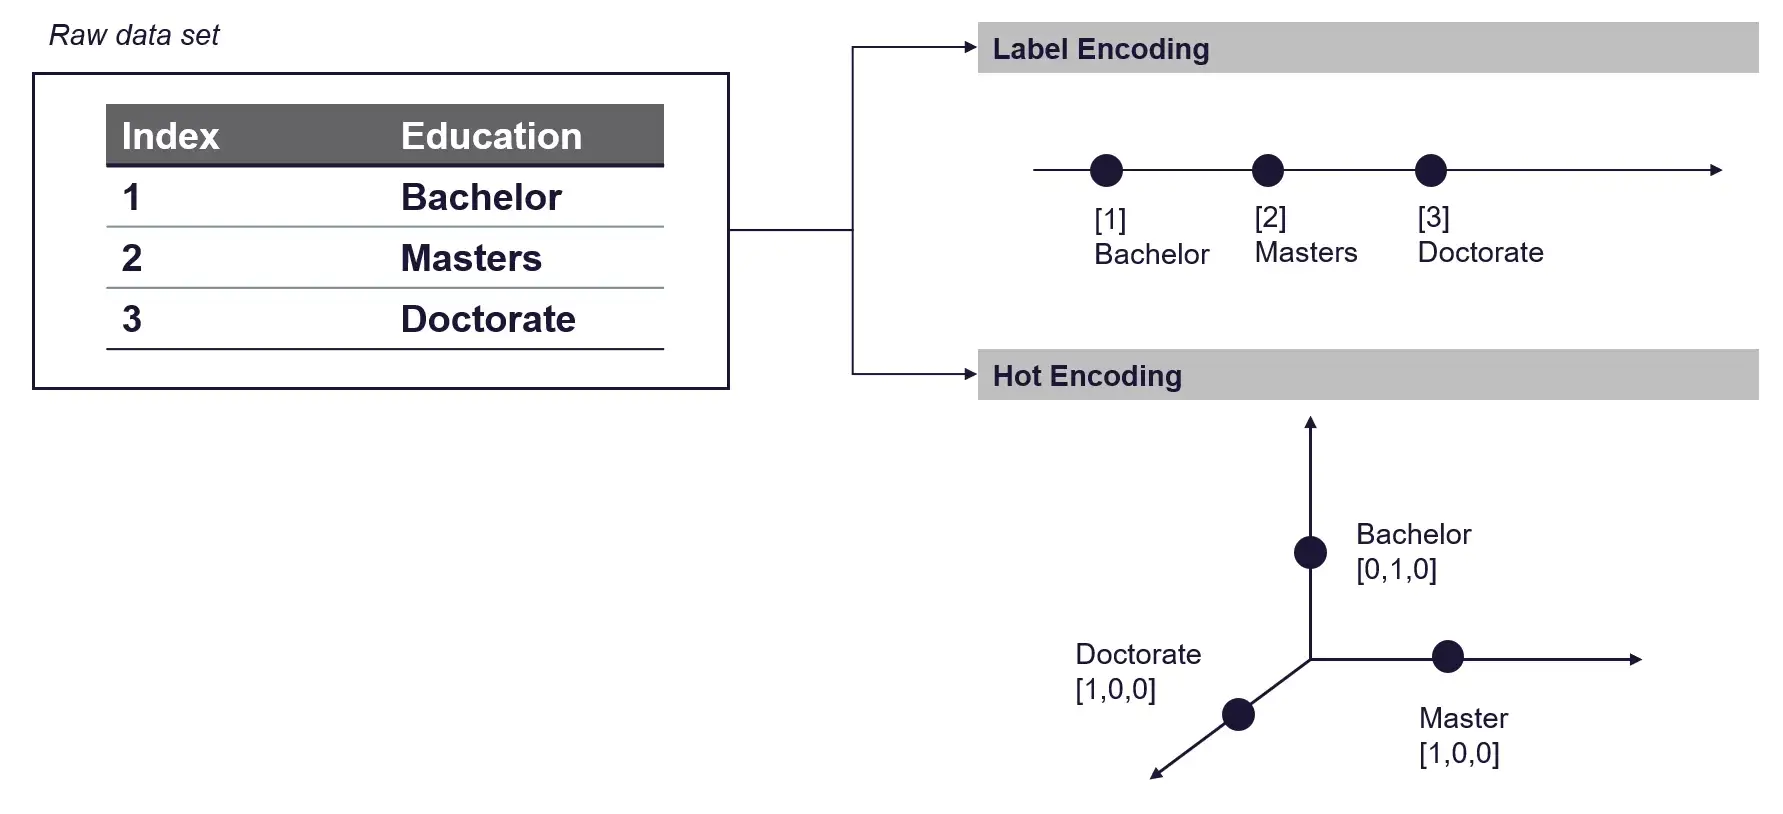
    
</div>

<center><b>Figure 1 | </b> Example of Encoding Techniques.</center> <br>


---

##### **Label/Ordinal Encoding** <a class='anchor' id='label-ordinal-encoding'></a>

- **Label/Ordinal encoding** involves assigning a numeric value to each categorical value. 
- Can be effective if exists an inherent order to the categorical values, which can be encoded as numeric values from $1$ to $k$. 
- This way of encoding can cause problems for some algorithms because the assigned integers do not necessarily reflect any inherent order or relationship between the categories. 
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values.

<br>

##### **One-Hot Encoding** <a class='anchor' id='one-hot-encoding'></a>

- In **One-hot encoding**, the column of categorical values is split into several new columns, one for each unique categorical value.
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values. 
- In **one-hot encoding**, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. 
- The binary variable indicates whether the category is present in an observation ($1$) or not ($0$). 
- A categorical variable with $n$ unique categories can be encoded in $(n-1)$ binary variables.
- This results in a *sparse matrix*, where most of the values are $0$.
- The disadvantage of one-hot encoding is that it can significantly increase the size of the dataset, which can be a problem if the column you want to encode contains hundreds or thousands of unique categorical values.
- I.e., the problem with one-hot encoding is that it can lead to large and sparse datasets with high dimensionality.

---

##### **Target Encoding**

In [30]:
# Mapping the target variable 'Claim Injury Type' to numerical values
claim_injury_type_dict = {"1. CANCELLED": 1, "2. NON-COMP": 2, 
                          "3. MED ONLY": 3, "4. TEMPORARY": 4, 
                          "5. PPD SCH LOSS": 5, "6. PPD NSL": 6, 
                          "7. PTD": 7, "8. DEATH": 8}

# Encode the target variable
y_train_encoded = y_train.map(claim_injury_type_dict)
y_val_encoded = y_val.map(claim_injury_type_dict)

# Check the first 5 values of the encoded target variable [Compare with the original target variable]
pd.DataFrame({'Original': y_train, 'Encoded': y_train_encoded})

Original  Encoded
Claim Identifier                       
6094685            2. NON-COMP        2
5535751           4. TEMPORARY        4
5715773            2. NON-COMP        2
5765474           4. TEMPORARY        4
6130855            2. NON-COMP        2
...                        ...      ...
5614897            2. NON-COMP        2
5994552           4. TEMPORARY        4
5659309           4. TEMPORARY        4
5744816            3. MED ONLY        3
5635719            2. NON-COMP        2

[430519 rows x 2 columns]

In [47]:
# Replace the target variable 'Claim Injury Type' with the encoded values, after confirming the correctness of the encoding
y_train = y_train_encoded
y_val = y_val_encoded

In [62]:
# Check the 'object' columns of the training set (X_train)
X_train.select_dtypes(include = 'object').columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type Bucket',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket'],
      dtype='object')

In [49]:
## for more details check:
# ?OrdinalEncoder

In [63]:
# Columns to be encoded
X_train.select_dtypes(include='object').columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type Bucket',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket'],
      dtype='object')

In [73]:
################### First Approach: Label Encoding ###################
# Label/Ordinal Encoding

# Create a new dataframe to store the encoded columns
X_train_ordinal_encoded = X_train.copy()
X_val_ordinal_encoded = X_val.copy()
test_data_ordinal_encoded = test_data.copy()

# Ensure that the categorical columns are 'object' type (Make 'category' type if they are not)
X_train_ordinal_encoded = X_train_ordinal_encoded.astype({col: 'object' for col in X_train.select_dtypes(include='category').columns})
X_val_ordinal_encoded = X_val_ordinal_encoded.astype({col: 'object' for col in X_val.select_dtypes(include='category').columns})
test_data_ordinal_encoded = test_data_ordinal_encoded.astype({col: 'object' for col in test_data.select_dtypes(include='category').columns})

# Initialize the OrdinalEncoder (Coder for categorical features)
ordinal_encoder = OrdinalEncoder()   # The number of categories is based on alphabetical order

# Fit the ordinal_encoder on all data (Avoid that some categories are not present in the training data)
ordinal_encoder.fit(pd.concat([X_train_ordinal_encoded, X_val_ordinal_encoded, test_data_ordinal_encoded], axis = 0)[X_train_ordinal_encoded.select_dtypes(include='object').columns])

# Transform the training data [All categorical columns will be transformed into numerical values]
    
# Transform the training data and save it in the same dataframe
X_train_ordinal_encoded_df = pd.DataFrame(
    ordinal_encoder.transform(X_train_ordinal_encoded[X_train_ordinal_encoded.select_dtypes(include='object').columns]),      # Transform the data
    columns = X_train_ordinal_encoded.select_dtypes(include='object').columns,                                                # Columns names are the same
    index = X_train_ordinal_encoded.index)                                                                                    # Keep the same index as the original dataframe

X_train_ordinal_encoded = pd.concat([X_train_ordinal_encoded.drop(columns = X_train_ordinal_encoded.select_dtypes(include='object').columns), X_train_ordinal_encoded_df], axis = 1)

# Transform the validation data -> I just 'transform' it because the ordinal_encoder is already fitted on the training data
X_val_ordinal_encoded_df = pd.DataFrame(ordinal_encoder.transform(X_val_ordinal_encoded[X_val_ordinal_encoded.select_dtypes(include='object').columns]), 
                                     columns = X_val_ordinal_encoded.select_dtypes(include='object').columns, index = X_val_ordinal_encoded.index)
X_val_ordinal_encoded = pd.concat([X_val_ordinal_encoded.drop(columns = X_val_ordinal_encoded.select_dtypes(include='object').columns), X_val_ordinal_encoded_df], axis = 1)

# Transform the test data
test_data_ordinal_encoded_df = pd.DataFrame(ordinal_encoder.transform(test_data_ordinal_encoded[test_data_ordinal_encoded.select_dtypes(include='object').columns]),
                                         columns = test_data_ordinal_encoded.select_dtypes(include='object').columns, index = test_data_ordinal_encoded.index)
test_data_ordinal_encoded = pd.concat([test_data_ordinal_encoded.drop(columns = test_data_ordinal_encoded.select_dtypes(include='object').columns), test_data_ordinal_encoded_df], axis = 1)
######################################################################

In [70]:
# Check the label encoded columns
X_train_ordinal_encoded

Industry Code  Number of Dependents  C-3 Date Binary  \
Claim Identifier                                                         
6094685                    56.0                     6                1   
5535751                    62.0                     3                0   
5715773                    62.0                     4                1   
5765474                    92.0                     3                0   
6130855                    44.0                     3                1   
...                         ...                   ...              ...   
5614897                    31.0                     3                1   
5994552                    92.0                     0                1   
5659309                    62.0                     5                0   
5744816                    45.0                     1                1   
5635719                    61.0                     6                1   

                  First Hearing Date Binary  Age at Injury Clean  \
Claim Identifier                                                   
6094685                                   1                 47.0   
5535751                                   0                 52.0   
5715773                                   1                 63.0   
5765474                                   0                 71.0   
6130855                                   1                 28.0   
...                                     ...                  ...   
5614897                                   1                 42.0   
5994552                                   1                 68.0   
5659309                                   0                 51.0   
5744816                                   1                 39.0   
5635719                                   1                 30.0   

                  Weekly Wage Reported  IME-4 Reported  Accident Date Year  \
Claim Identifier                                                             
6094685                              0               0              2022.0   
5535751                              1               1              2020.0   
5715773                              0               0              2021.0   
5765474                              1               1              2021.0   
6130855                              0               0              2022.0   
...                                ...             ...                 ...   
5614897                              0               0              2020.0   
5994552                              1               0              2022.0   
5659309                              1               1              2021.0   
5744816                              0               0              2021.0   
5635719                              0               0              2021.0   

                  Accident Date Month  Accident Date Day  \
Claim Identifier                                           
6094685                           9.0               22.0   
5535751                           8.0                5.0   
5715773                           5.0                3.0   
5765474                           7.0                7.0   
6130855                          11.0                8.0   
...                               ...                ...   
5614897                          11.0               30.0   
5994552                           5.0               12.0   
5659309                           2.0               11.0   
5744816                           6.0                5.0   
5635719                           1.0                6.0   

                  Accident Date Weekday  Assembly Date Year  \
Claim Identifier                                              
6094685                             3.0                2022   
5535751                             2.0                2020   
5715773                             0.0                2021   
5765474                             2.0                2021

In [66]:
## for more details check:
# ?OneHotEncoder

In [54]:
################### Second Approach: One-Hot Encoding ###################
# One-Hot Encoding

# Create a new dataframe for the One-Hot Encoding
X_train_ohe = X_train.copy()
X_val_ohe = X_val.copy()
test_data_ohe = test_data.copy()

# Ensure that the categorical columns are 'object' type (Make 'category' type if they are not)
X_train_ohe = X_train_ohe.astype({col: 'object' for col in X_train.select_dtypes(include='category').columns})
X_val_ohe = X_val_ohe.astype({col: 'object' for col in X_val.select_dtypes(include='category').columns})
test_data_ohe = test_data_ohe.astype({col: 'object' for col in test_data.select_dtypes(include='category').columns})

# Function to change the name of the columns 
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html
def custom_combiner(feature, category):
    return str(feature) + "_" + str(category)

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(feature_name_combiner=custom_combiner,       # Custom function to change the name of the columns
                                handle_unknown="ignore",                     # Ignore unknown categories
                                sparse_output=False,                         # sparse=False to return a numpy array
                                drop="first")                                # drop='first' to fix the dummy variable trap (n-1)

# Fit and transform the training data [All categorical columns will be transformed into numerical values]
X_train_ohe_values = one_hot_encoder.fit_transform(X_train_ohe[X_train.select_dtypes(include='object').columns])
X_train_ohe_values_df = pd.DataFrame(X_train_ohe_values, 
                                     columns = one_hot_encoder.get_feature_names_out(X_train.select_dtypes(include='object').columns), 
                                     index = X_train_ohe.index)
X_train_ohe = pd.concat([X_train_ohe.drop(columns = X_train_ohe.select_dtypes(include='object').columns), X_train_ohe_values_df], axis = 1)

# Fit and Transform the validation data
X_val_ohe_values = one_hot_encoder.fit_transform(X_val_ohe[X_val.select_dtypes(include='object').columns])
X_val_ohe_values_df = pd.DataFrame(X_val_ohe_values, columns = one_hot_encoder.get_feature_names_out(X_val.select_dtypes(include='object').columns), index = X_val_ohe.index)
X_val_ohe = pd.concat([X_val_ohe.drop(columns = X_val_ohe.select_dtypes(include='object').columns), X_val_ohe_values_df], axis = 1)

#  Fit and Transform the test data
test_data_ohe_values = one_hot_encoder.fit_transform(test_data_ohe[test_data.select_dtypes(include='object').columns])
test_data_ohe_values_df = pd.DataFrame(test_data_ohe_values, columns = one_hot_encoder.get_feature_names_out(test_data.select_dtypes(include='object').columns), index = test_data_ohe.index)
test_data_ohe = pd.concat([test_data_ohe.drop(columns = test_data_ohe.select_dtypes(include='object').columns), test_data_ohe_values_df], axis = 1)

In [55]:
# Check the One-Hot encoded columns
X_train_ohe

Industry Code  Number of Dependents  C-3 Date Binary  \
Claim Identifier                                                         
6094685                    56.0                     6                1   
5535751                    62.0                     3                0   
5715773                    62.0                     4                1   
5765474                    92.0                     3                0   
6130855                    44.0                     3                1   
...                         ...                   ...              ...   
5614897                    31.0                     3                1   
5994552                    92.0                     0                1   
5659309                    62.0                     5                0   
5744816                    45.0                     1                1   
5635719                    61.0                     6                1   

                  First Hearing Date Binary  Age at Injury Clean  \
Claim Identifier                                                   
6094685                                   1                 47.0   
5535751                                   0                 52.0   
5715773                                   1                 63.0   
5765474                                   0                 71.0   
6130855                                   1                 28.0   
...                                     ...                  ...   
5614897                                   1                 42.0   
5994552                                   1                 68.0   
5659309                                   0                 51.0   
5744816                                   1                 39.0   
5635719                                   1                 30.0   

                  Weekly Wage Reported  IME-4 Reported  Accident Date Year  \
Claim Identifier                                                             
6094685                              0               0              2022.0   
5535751                              1               1              2020.0   
5715773                              0               0              2021.0   
5765474                              1               1              2021.0   
6130855                              0               0              2022.0   
...                                ...             ...                 ...   
5614897                              0               0              2020.0   
5994552                              1               0              2022.0   
5659309                              1               1              2021.0   
5744816                              0               0              2021.0   
5635719                              0               0              2021.0   

                  Accident Date Month  Accident Date Day  \
Claim Identifier                                           
6094685                           9.0               22.0   
5535751                           8.0                5.0   
5715773                           5.0                3.0   
5765474                           7.0                7.0   
6130855                          11.0                8.0   
...                               ...                ...   
5614897                          11.0               30.0   
5994552                           5.0               12.0   
5659309                           2.0               11.0   
5744816                           6.0                5.0   
5635719                           1.0                6.0   

                  Accident Date Weekday  Assembly Date Year  \
Claim Identifier                                              
6094685                             3.0                2022   
5535751                             2.0                2020   
5715773                             0.0                2021   
5765474                             2.0                2021

> **One-Hot Encoding** cannot be applied to the **`Claim Injury Type`** variable, since that is the target variable. That approach would make the problem **multi-label** and not a **multi-class** problem, which is the case in this project.

> If we were to apply **One-Hot Encoding** to the target variable, we would have to create a separate model for each class, which would make the problem much more complex for the model and would very likely lead to lower performance, or it would require much more data in order to reach the same performance as regular classification.<sup>[[3]](https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable)</sup>

---

#### **4 | Multicollinearity** <a class='anchor' id='4-multicollinearity'></a>


##### **Variance Inflation Factor (VIF)**

- **VIF** is a measure of multicollinearity among predictor variables within a multiple regression.
- **VIF** estimates how much the variance of a regression coefficient is increased due to multicollinearity in the model.

The formula for **VIF** is:

$$VIF = \frac{1}{1 - R^2}$$

Where $R^2$ is the coefficient of determination in a regression model where the predictor variable is regressed against all other predictor variables.

- **VIF** values are always greater than or equal to $1$.
- If **VIF** is equal to $1$, then there is no correlation among the predictor variables.
- If **VIF** is greater than $1$, then the predictors are correlated with other variables in the model.
- The general rule of thumb is that if **VIF** is greater than $10$, then multicollinearity is high and the predictors are highly correlated.
- In this case, the predictors should be removed from the model.

<br>

> In other words, **Variance Inflation Factor (VIF)** measures how much the variance of a coefficient is inflated due to multicollinearity with other independent variables. The square root of the VIF for a given variable indicates how much larger its standard deviation is compared to a scenario where that variable is not correlated with any other independent variable. If there is no correlation between variables, the VIF values are close to 1.


In [71]:
### use VIF to analise multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the vif for all given features
def compute_vif(df, considered_features='all'):
    """
    :param df: DataFrame containing the features to compute VIF for.
    :param considered_features: List of features to consider for VIF calculation. If 'all', all features in the DataFrame will be considered.
    
    :return: DataFrame containing VIF values for the considered features.
    """
    # If no features are given, consider all features
    if considered_features == 'all':
        considered_features = df.columns
    
    # Create a new dataframe with the considered features
    X = df[considered_features]
    
    # Ensure all features are numeric
    for column in X.columns:
        X[column] = pd.to_numeric(X[column], errors='coerce')
    
    # The calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # Create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    vif = vif[vif['Variable']!='intercept']
    return vif

# Features to consider removing (VIF >5)
# In this case, we will consider 'X_train_ordinal_encoded' because in 'X_train_ohe' we have a lot of 'correlated columns'
compute_vif(X_train_ordinal_encoded).sort_values('VIF', ascending=False)

Variable       VIF
12             Assembly Date Month  9.181886
16                  C-2 Date Month  8.705139
17                    C-2 Date Day  3.119764
13               Assembly Date Day  3.115045
20         Attorney/Representative  2.940575
15                   C-2 Date Year  2.698720
6                   IME-4 Reported  2.259347
3        First Hearing Date Binary  2.163088
11              Assembly Date Year  2.160962
8              Accident Date Month  1.975366
2                  C-3 Date Binary  1.960682
7               Accident Date Year  1.626351
5             Weekly Wage Reported  1.619872
18                C-2 Date Weekday  1.574358
14           Assembly Date Weekday  1.571044
22              COVID-19 Indicator  1.429967
28    WCIO Nature of Injury Bucket  1.372824
27     WCIO Cause of Injury Bucket  1.193825
0                    Industry Code  1.190107
29        WCIO Part of Body Bucket  1.159398
26             Carrier Type Bucket  1.133852
25              Medical Fee Region  1.132546
19  Alternative Dispute Resolution  1.126117
23                   District Name  1.055643
21                County of Injury  1.036458
4              Age at Injury Clean  1.030711
24                          Gender  1.026232
10           Accident Date Weekday  1.008604
9                Accident Date Day  1.003814
1             Number of Dependents  1.000083

---

In [72]:
# To avoid run the code above, we can save the training, validation and test data after feature engineering 
# Save the data
X_train.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train.parquet', engine = 'fastparquet')
X_val.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val.parquet', engine = 'fastparquet')
test_data.to_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data.parquet', engine = 'fastparquet')

# Save the target variable (Series cannot be saved in parquet format - Convert to DataFrame)
y_train.to_frame().to_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train.parquet', engine = 'fastparquet')
y_val.to_frame().to_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val.parquet', engine = 'fastparquet')

# Save the target variable encoded
y_train_encoded.to_frame().to_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train_encoded.parquet', engine = 'fastparquet')
y_val_encoded.to_frame().to_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val_encoded.parquet', engine = 'fastparquet')

# Save the Ordinal encoded data
X_train_ordinal_encoded.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ordinal_encoded.parquet', engine = 'fastparquet')
X_val_ordinal_encoded.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ordinal_encoded.parquet', engine = 'fastparquet')
test_data_ordinal_encoded.to_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ordinal_encoded.parquet', engine = 'fastparquet')

# Save the One-Hot encoded data
X_train_ohe.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ohe.parquet', engine = 'fastparquet')
X_val_ohe.to_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ohe.parquet', engine = 'fastparquet')
test_data_ohe.to_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ohe.parquet', engine = 'fastparquet')

In [5]:
# Load the training and validation sets after feature engineering
X_train = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train.parquet')
X_val = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val.parquet')
test_data = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data.parquet')

# Load the target variable
y_train = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train.parquet').squeeze()   # .squeeze() to convert to Series
y_val = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val.parquet').squeeze()

# Load the target variable encoded
y_train_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_train_encoded.parquet').squeeze()   # .squeeze() to convert to Series
y_val_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/y_val_encoded.parquet').squeeze()

# Load the Ordinal encoded data
X_train_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ordinal_encoded.parquet')
X_val_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ordinal_encoded.parquet')
test_data_ordinal_encoded = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ordinal_encoded.parquet')

# Load the One-Hot encoded data
X_train_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_train_ohe.parquet')
X_val_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/X_val_ohe.parquet')
test_data_ohe = pd.read_parquet('data/2ndNotebook/AfterFeatureEngineering/test_data_ohe.parquet')

# Check the shape of the training, validation and test data

# Check the shape of the training, validation and test data (Features
print(X_train.shape, X_val.shape, test_data.shape)
print(X_train_ordinal_encoded.shape, X_val_ordinal_encoded.shape, test_data_ordinal_encoded.shape)
print(X_train_ohe.shape, X_val_ohe.shape, test_data_ohe.shape)

# Check the shape of the training, validation and test data (Target)
print('\n',y_train.shape, y_val.shape)
print('',y_train_encoded.shape, y_val_encoded.shape)

(430519, 30) (143507, 30) (387975, 30)
(430519, 30) (143507, 30) (387975, 30)
(430519, 123) (143507, 123) (387975, 123)

 (430519,) (143507,)
 (430519,) (143507,)


---

## **🎚️ Feature Selection** 

### **Filter Methods**

<div style="max-width:750px; display: block; margin: 0 auto;">
    <img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png">
</div>

<br>

- Correlation coefficient   ✅
- Chi-Square Test ✅ (with ETA Squared)

> On previous notebook, we have already done the **Filter Methods**, but we will do it again to check if the **Feature Engineering** process has changed the results.

##### **Correlation Coefficient**

In [81]:
# Spearman correlation matrix
cor_spearman = pd.concat([X_train_ordinal_encoded, y_train_encoded], axis=1).corr(method='spearman')
cor_spearman = cor_spearman.round(2)
cor_spearman

Alternative Dispute Resolution  \
Alternative Dispute Resolution                            1.00   
Attorney/Representative                                  -0.03   
County of Injury                                          0.02   
COVID-19 Indicator                                       -0.01   
District Name                                             0.01   
Gender                                                    0.05   
Industry Code                                            -0.11   
Medical Fee Region                                        0.05   
Number of Dependents                                     -0.00   
C-3 Date Binary                                           0.03   
First Hearing Date Binary                                 0.04   
Age at Injury Clean                                       0.02   
Weekly Wage Reported                                     -0.05   
IME-4 Reported                                           -0.03   
Carrier Type Bucket                                       0.11   
WCIO Cause of Injury Bucket                              -0.11   
WCIO Nature of Injury Bucket                             -0.20   
WCIO Part of Body Bucket                                 -0.11   
Accident Date Year                                       -0.01   
Accident Date Month                                       0.00   
Accident Date Day                                         0.00   
Accident Date Weekday                                    -0.01   
Assembly Date Year                                       -0.00   
Assembly Date Month                                       0.00   
Assembly Date Day                                         0.00   
Assembly Date Weekday                                    -0.00   
C-2 Date Year                                             0.01   
C-2 Date Month                                            0.01   
C-2 Date Day                                              0.00   
C-2 Date Weekday                                          0.00   
Claim Injury Type                                        -0.06   

                                Attorney/Representative  County of Injury  \
Alternative Dispute Resolution                    -0.03              0.02   
Attorney/Representative                            1.00              0.00   
County of Injury                                   0.00              1.00   
COVID-19 Indicator                                -0.04              0.03   
District Name                                      0.04              0.01   
Gender                                             0.09              0.01   
Industry Code                                      0.02             -0.01   
Medical Fee Region                                 0.18              0.13   
Number of Dependents                              -0.00              0.00   
C-3 Date Binary                                   -0.69             -0.01   
First Hearing Date Binary                         -0.66              0.00   
Age at Injury Clean                                0.14              0.03   
Weekly Wage Reported                               0.52              0.01   
IME-4 Reported                                     0.66             -0.00   
Carrier Type Bucket                                0.08             -0.02   
WCIO Cause of Injury Bucket                        0.03             -0.02   
WCIO Nature of Injury Bucket                      -0.00              0.01   
WCIO Part of Body Bucket                           0.09              0.00   
Accident Date Year                                -0.05              0.00   
Accident Date Month                               -0.01              0.00   
Accident Date Day                                  0.00             -0.00   
Accident Date Weekday                              0.00             -0.00   
Assembly Date Year                                -0.04              0.00   
Assembly Date Month                               -0.00              0.

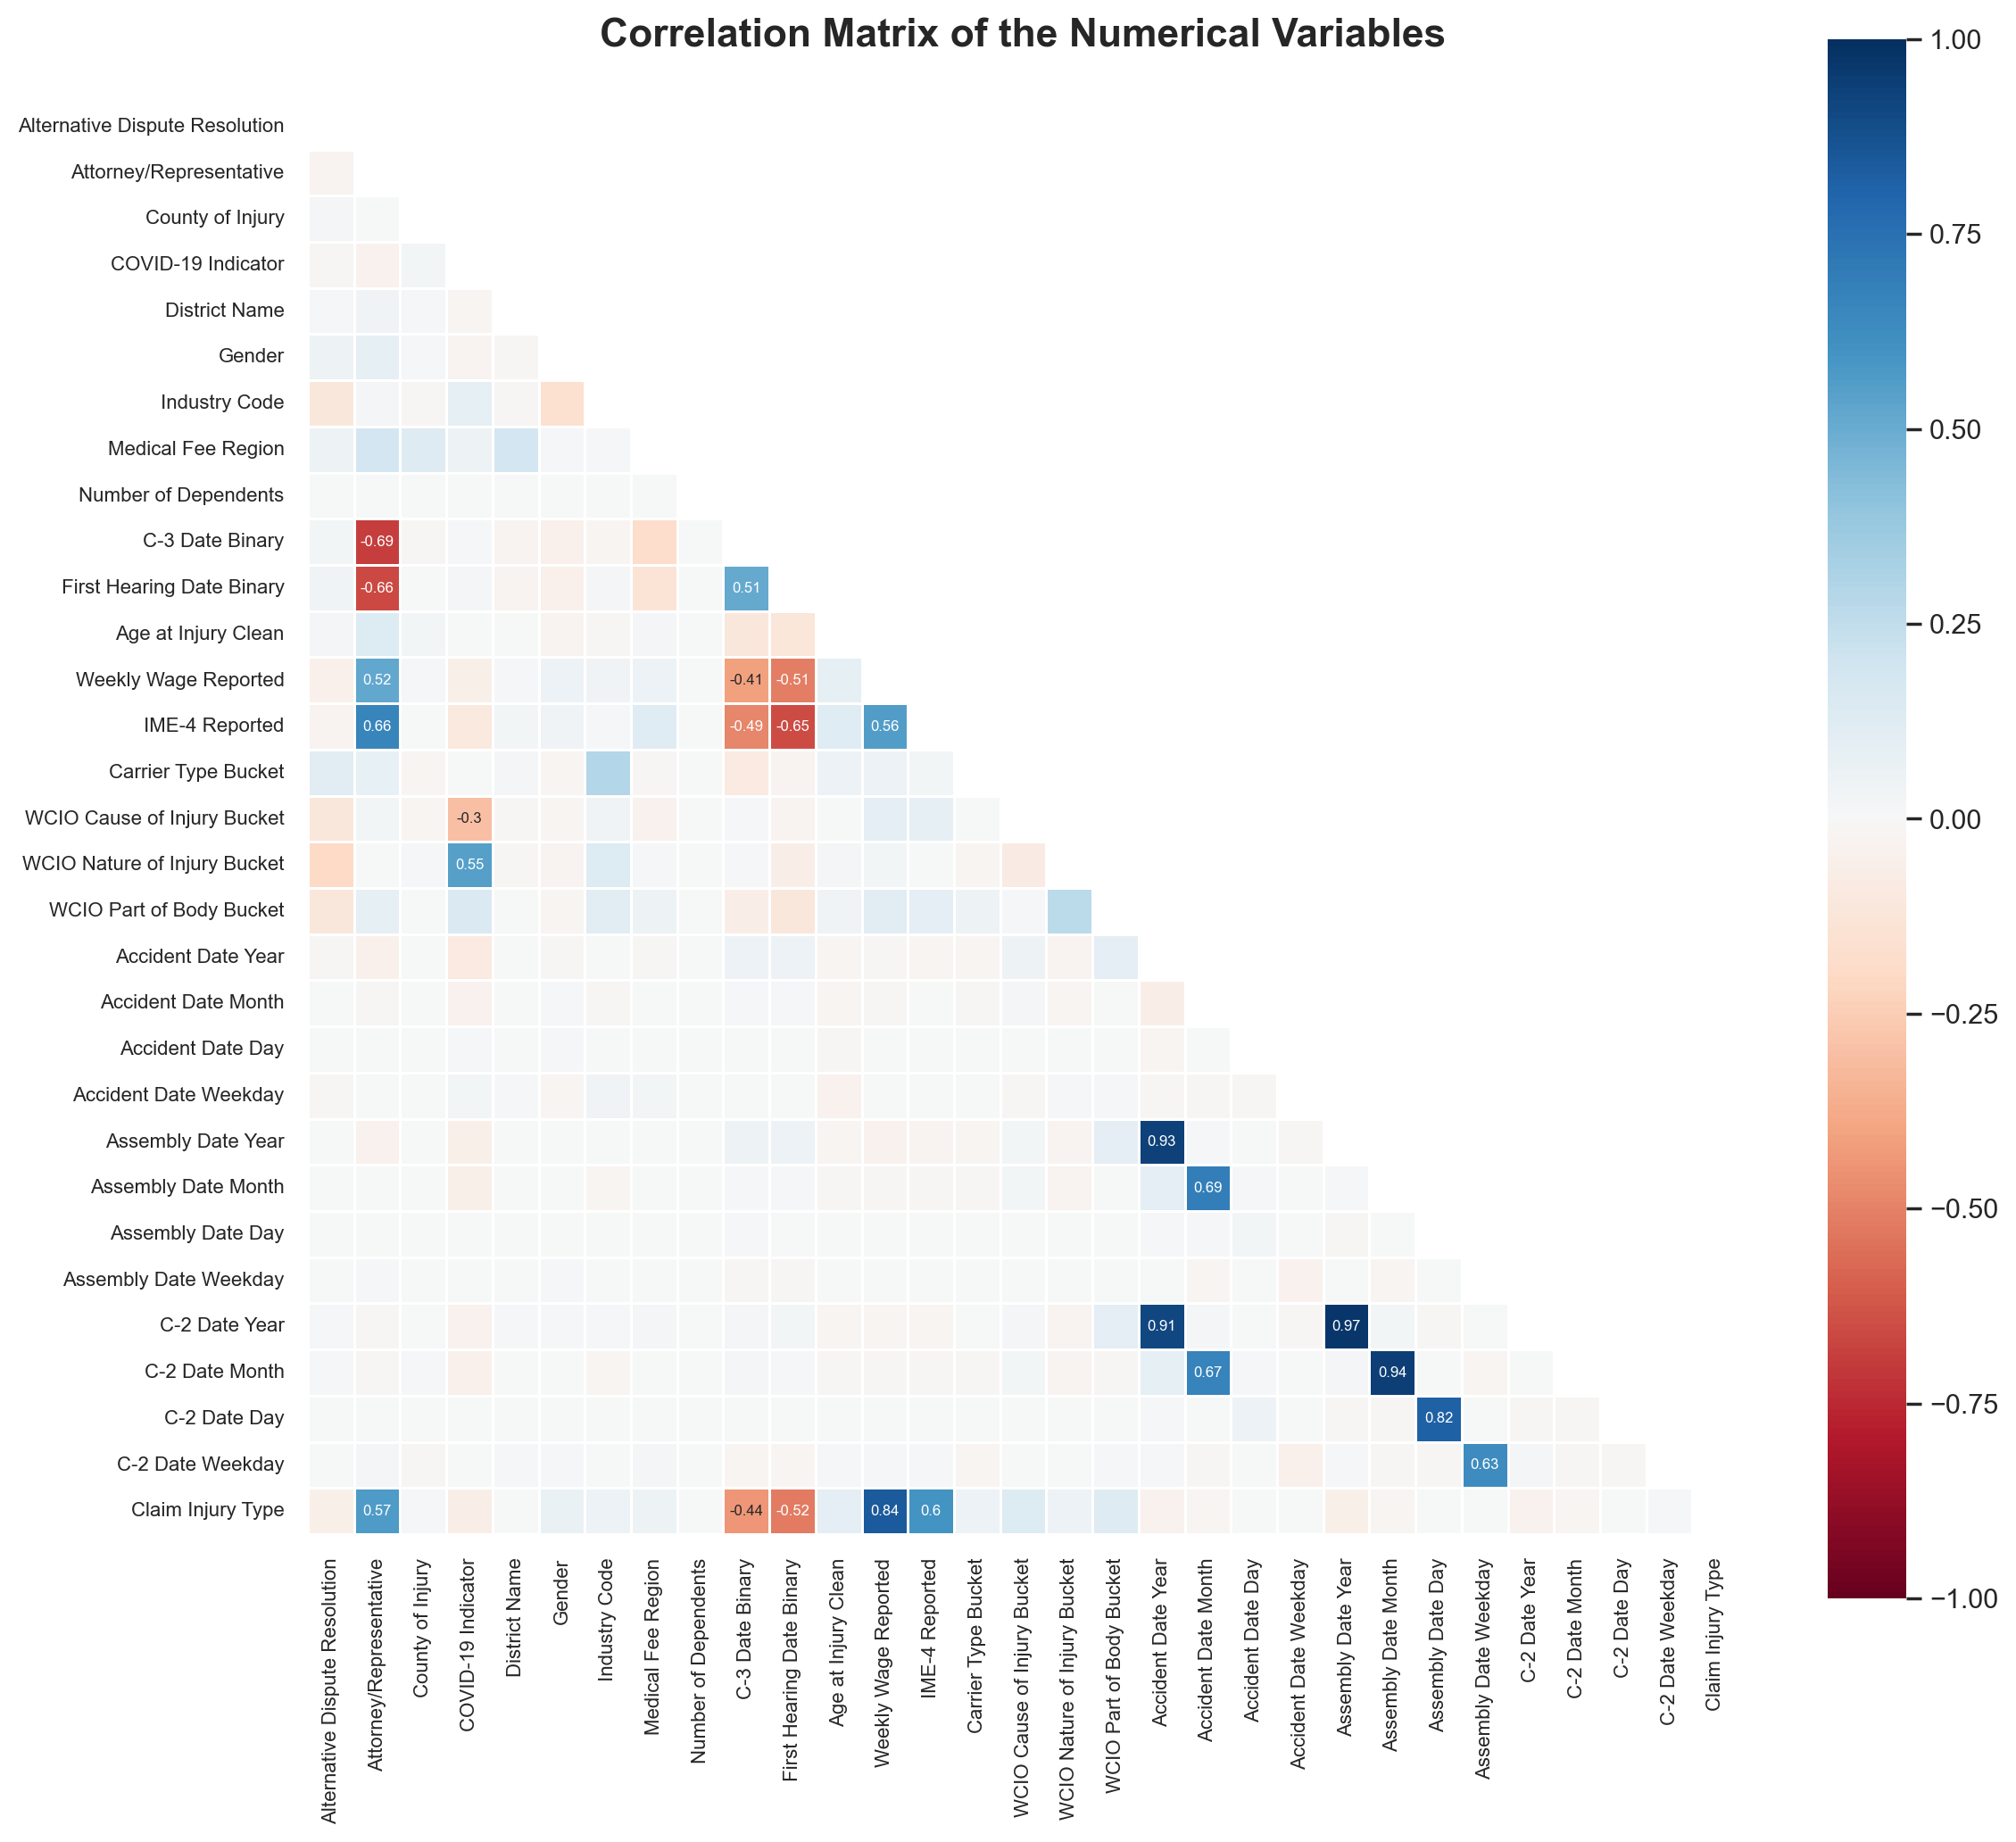

In [82]:
# ---------------------- Spearman Correlation [Heatmap] ----------------------
# Show only high or low values: values above |0.3| will appear annotated in the plot
mask_annot = np.absolute(cor_spearman.values) >= 0.3
annot = np.where(mask_annot, cor_spearman.values, np.full(cor_spearman.shape,""))

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros_like(cor_spearman, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# # Create a custom diverging palette from red (-1) to white (0) to green (1)
# cmap = sns.diverging_palette(10, 130, s=100, l=50, n=9, center='light', as_cmap=True)

# Plot the correlation matrix as a Heatmap
fig = plt.figure(figsize=(12, 12))
sns.heatmap(cor_spearman,
            mask=mask,      # Hide the upper triangle
            cmap='RdBu',    # Colot Palette
            annot=annot,    # Show only VERY high or VERY low values
            fmt='s',        # fmt='s' -> string format
            # annot=True,     # Show all values
            annot_kws={'fontsize':6}, cbar_kws={'shrink':0.8},
            vmin=-1, vmax=1, center=0, linewidths=0.5, square=True)

plt.title('Correlation Matrix of the Numerical Variables\n', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
fig.savefig('./[ML]_Project_EDAOutputs_Group33/Spearman_Correlation_Matrix_Numerical_AfterFeatureEngineering.png', dpi=300)
plt.show()

##### **Chi-Square Test**

In [6]:
def TestIndependence(X,y,var,alpha=0.05):        
    """
    Test the independence of a categorical variable with respect to the target variable using the Chi-Square test.

    Parameters:
    X (pd.Series): The categorical variable to be tested.
    y (pd.Series): The target variable.
    var (str): The name of the variable being tested.
    alpha (float, optional): The significance level to determine if the variable is important. Default is 0.05.

    Returns:
    None: Prints whether the variable is important for prediction or not based on the Chi-Square test.
    """
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [10]:
# Apply the TestIndependence function to all categorical variables
X_train_cat_cols = X_train.select_dtypes(include='object').columns
for var in X_train_ordinal_encoded[X_train_cat_cols]:
    TestIndependence(X_train_ordinal_encoded[var], y_train, var, alpha=1)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
Carrier Type Bucket is IMPORTANT for Prediction
WCIO Cause of Injury Bucket is IMPORTANT for Prediction
WCIO Nature of Injury Bucket is IMPORTANT for Prediction
WCIO Part of Body Bucket is IMPORTANT for Prediction


In [ ]:
# Apply the TestIndependence function to validate to compare the results
for var in X_val_ordinal_encoded[X_train_cat_cols]:
    TestIndependence(X_val_ordinal_encoded[var], y_val, var, alpha=0.2)

Alternative Dispute Resolution is IMPORTANT for Prediction
Attorney/Representative is IMPORTANT for Prediction
County of Injury is IMPORTANT for Prediction
COVID-19 Indicator is IMPORTANT for Prediction
District Name is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Medical Fee Region is IMPORTANT for Prediction
Carrier Type Bucket is IMPORTANT for Prediction
WCIO Cause of Injury Bucket is IMPORTANT for Prediction
WCIO Nature of Injury Bucket is IMPORTANT for Prediction
WCIO Part of Body Bucket is IMPORTANT for Prediction


### **Wrapper Methods**

##### Recursive Feature Elimination (RFE)

In [ ]:
# -------------------------------------- RFE --------------------------------------
# No of features
nof_list = np.arange(1, len(X_train_ordinal_encoded.columns) + 1)    # List to store the number of features to be selected (1 to nn features)
high_score = 0                                                       # Variable to store the highest score 

# Variable to store the optimum features
nof = 0           
train_score_list = []
val_score_list = []

# Loop to select the best no of features [RFE]
for n in tqdm(range(len(nof_list))):

    # Model to test - Gradient Boosting Classifier - too many mins to run locally
    # model = GradientBoostingClassifier()

    # Model to test - Simplified version - Decision Tree Classifier
    model = DecisionTreeClassifier()
    
    # RFE 
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])

    # Fit the model
    X_train_rfe = rfe.fit_transform(X_train_ordinal_encoded,y_train)
    X_val_rfe = rfe.transform(X_val_ordinal_encoded)
    model.fit(X_train_rfe,y_train)
    
    # Storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    # Storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    # Check best score
    if (val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]

        # Features to select (adding mention of variables to keep)
        features_to_select = pd.Series(rfe.support_, index = X_train_ordinal_encoded.columns)
    
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

100%|██████████| 30/30 [54:46<00:00, 109.55s/it] 

Optimum number of features: 1
Score with 1 features: 0.736591
Features to select: 
Alternative Dispute Resolution    False
Attorney/Representative           False
County of Injury                  False
COVID-19 Indicator                False
District Name                     False
Gender                            False
Industry Code                     False
Medical Fee Region                False
Number of Dependents              False
C-3 Date Binary                   False
First Hearing Date Binary         False
Age at Injury Clean               False
Weekly Wage Reported               True
IME-4 Reported                    False
Carrier Type Bucket               False
WCIO Cause of Injury Bucket       False
WCIO Nature of Injury Bucket      False
WCIO Part of Body Bucket          False
Accident Date Year                False
Accident Date Month               False
Accident Date Day                 False
Accident Date Weekday             False
Assembly Date Year                Fal

```p
100%|██████████| 30/30 [54:46<00:00, 109.55s/it] 
Optimum number of features: 1
Score with 1 features: 0.736591
Features to select: 
Alternative Dispute Resolution    False
Attorney/Representative           False
County of Injury                  False
COVID-19 Indicator                False
District Name                     False
Gender                            False
Industry Code                     False
Medical Fee Region                False
Number of Dependents              False
C-3 Date Binary                   False
First Hearing Date Binary         False
Age at Injury Clean               False
Weekly Wage Reported               True
IME-4 Reported                    False
Carrier Type Bucket               False
WCIO Cause of Injury Bucket       False
WCIO Nature of Injury Bucket      False
WCIO Part of Body Bucket          False
Accident Date Year                False
Accident Date Month               False
Accident Date Day                 False
Accident Date Weekday             False
Assembly Date Year                False
Assembly Date Month               False
Assembly Date Day                 False
Assembly Date Weekday             False
C-2 Date Year                     False
C-2 Date Month                    False
C-2 Date Day                      False
C-2 Date Weekday                  False
dtype: bool
```

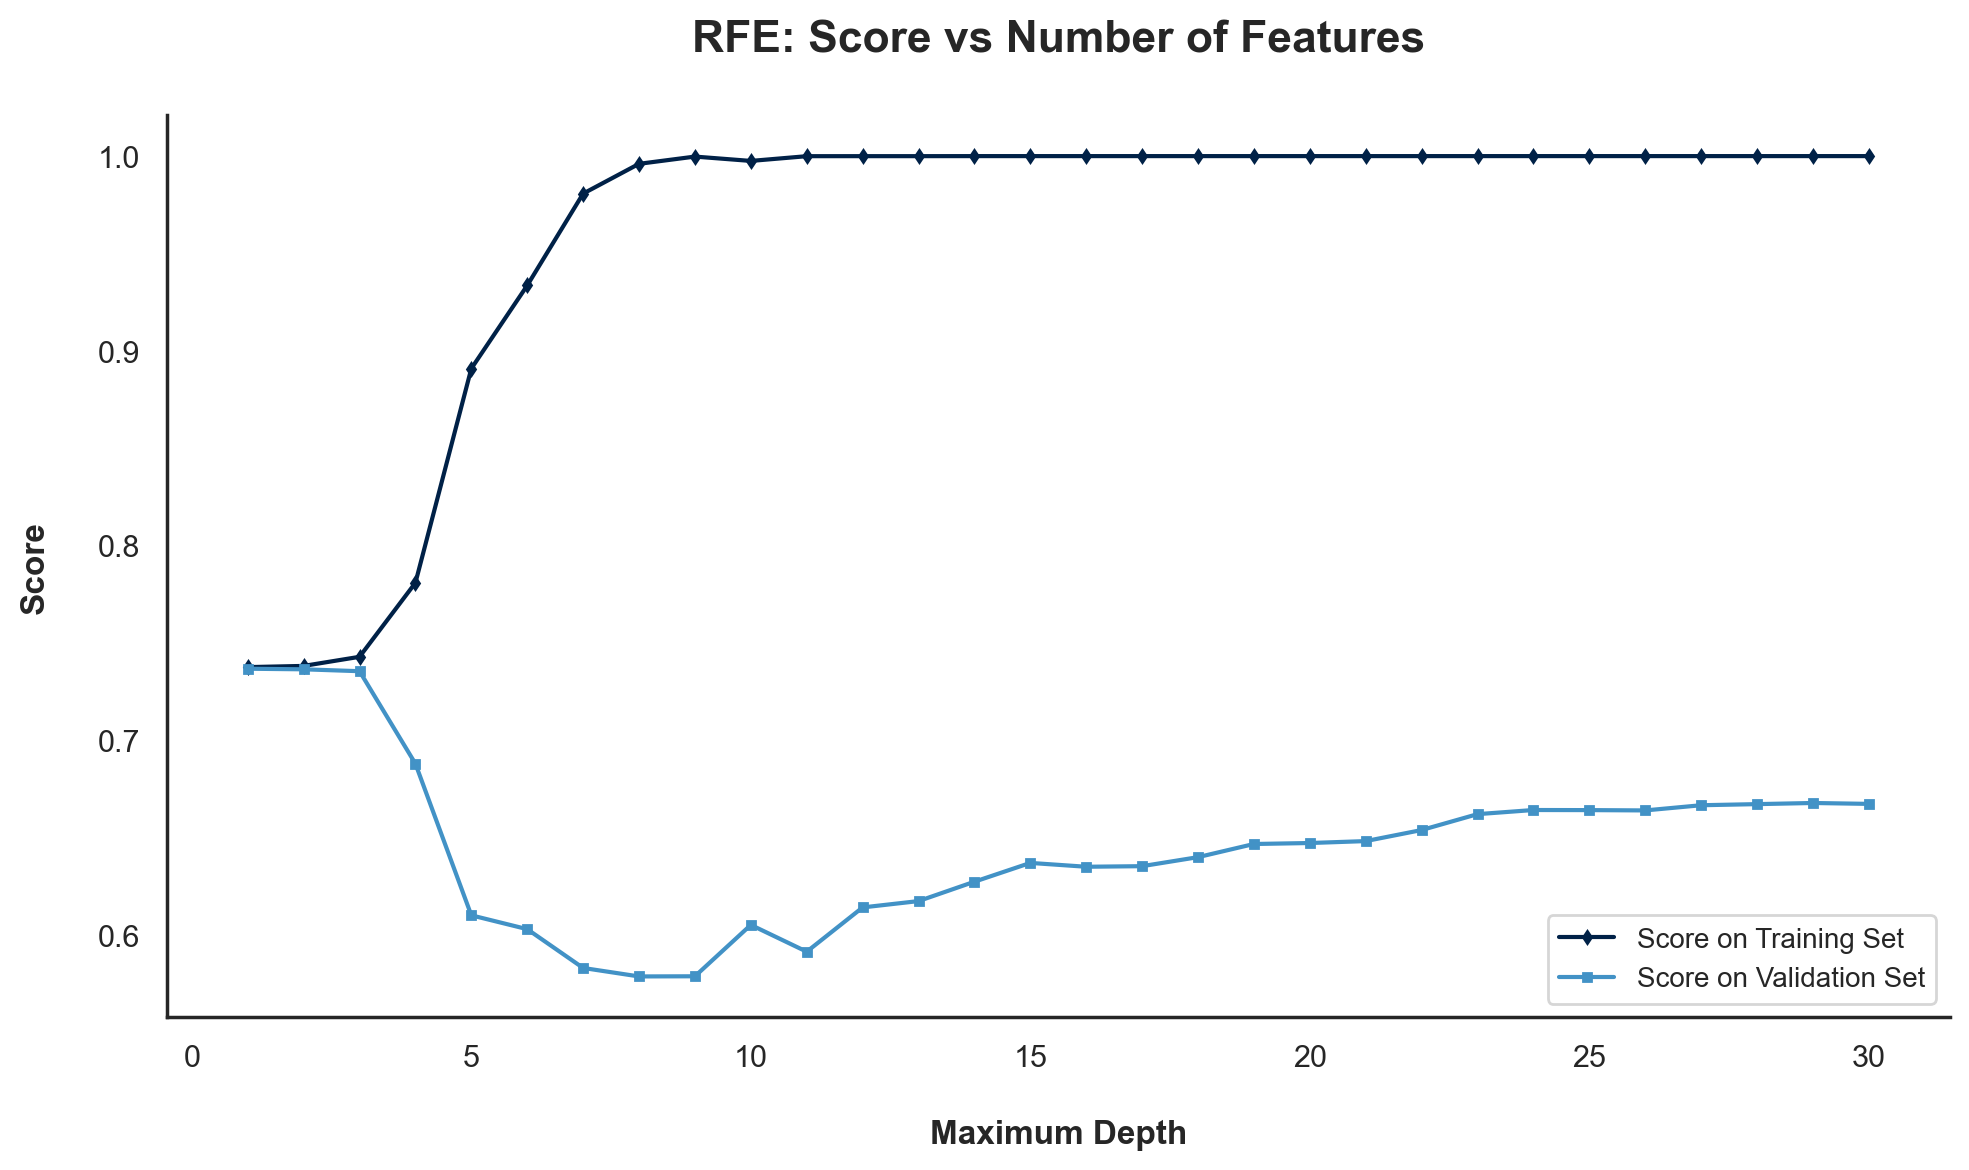

In [21]:
# Plot the results of the RFE
fig = plt.figure(figsize=(10,6))
plt.plot(list(range(1,len(X_train_ordinal_encoded.columns) + 1)), train_score_list, label="Score on Training Set", color='#002147', marker='d', markersize=3)
plt.plot(list(range(1,len(X_train_ordinal_encoded.columns) + 1)), val_score_list, label="Score on Validation Set", color='#4292C6', marker='s', markersize=3)

# Customizing the plot
plt.title("RFE: Score vs Number of Features\n", fontsize=16, fontweight='bold')
plt.xlabel("\nMaximum Depth", fontsize=12, fontweight='bold')
plt.ylabel("Score\n", fontsize=12, fontweight='bold')
plt.legend(loc='best', fontsize=10, frameon=True)

sns.despine(top=True, right=True)
plt.tight_layout()
# fig.savefig('./[ML]_Project_EDAOutputs_Group33/RFE_Score_vs_Number_of_Features.png', dpi=300, bbox_inches='tight')
plt.show()

### **Embedded Methods**

#### **Ridge Regression** (L2 Regularization)

<br>

$$\text{Ridge Regression} = \text{Linear Regression} + \text{L2 Regularization}$$

<br> **Cost Function for Ridge Regression:**

$$\text{Cost Function} = \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{M} (y_i - \sum_{j=1}^{p} w_j \times x_{ij})^2 + \lambda \sum_{j=1}^{p} w_j^2$$

The Ridge Regression is a linear regression model that uses the L2 regularization technique. It is used to prevent overfitting and as a result, it helps to improve the model's accuracy. The L2 regularization adds a penalty equal to the square of the magnitude of the coefficients.

The objective of the Ridge Regression is to minimize the cost function $\text{sum of squared residuals}$ plus the **L2 regularization term** ($\lambda \times \text{the \; slope}^2$).

Where $\lambda$ is the regularization parameter.
- $\lambda$ can range from 0 to positive infinity
- $\lambda=0$ then Ridge regression is same as Least Squares
- Increasing $\lambda$ will promote a smaller slope (asymptotically to zero)
- How to choose $\lambda$
  - CV to determine the lowest variance
- Ridge Regression can solve for parameters when there is not enough data samples

<br><br>

---

#### **Lasso Regression** (Least Absolute Shrinkage and Selection operator)

<br>

$$\text{Lasso Regression} = \text{Linear Regression} + \text{L1 Regularization}$$

<br> Cost Function for LASSO Regression:

$$\text{Cost Function} = \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{M} (y_i - \sum_{j=1}^{p} w_j \times x_{ij})^2 + \lambda \sum_{j=1}^{p} |w_j|$$

The Lasso Regression is a linear regression model that uses the L1 regularization technique. It is used to prevent overfitting and as a result, it helps to improve the model's accuracy. The L1 regularization adds a penalty equal to the absolute value of the magnitude of the coefficients.

- Difference is instead of taking the square of the coefficients, magnitudes are taken into account.
- This type of regularization (**L1**) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output

<br>

---



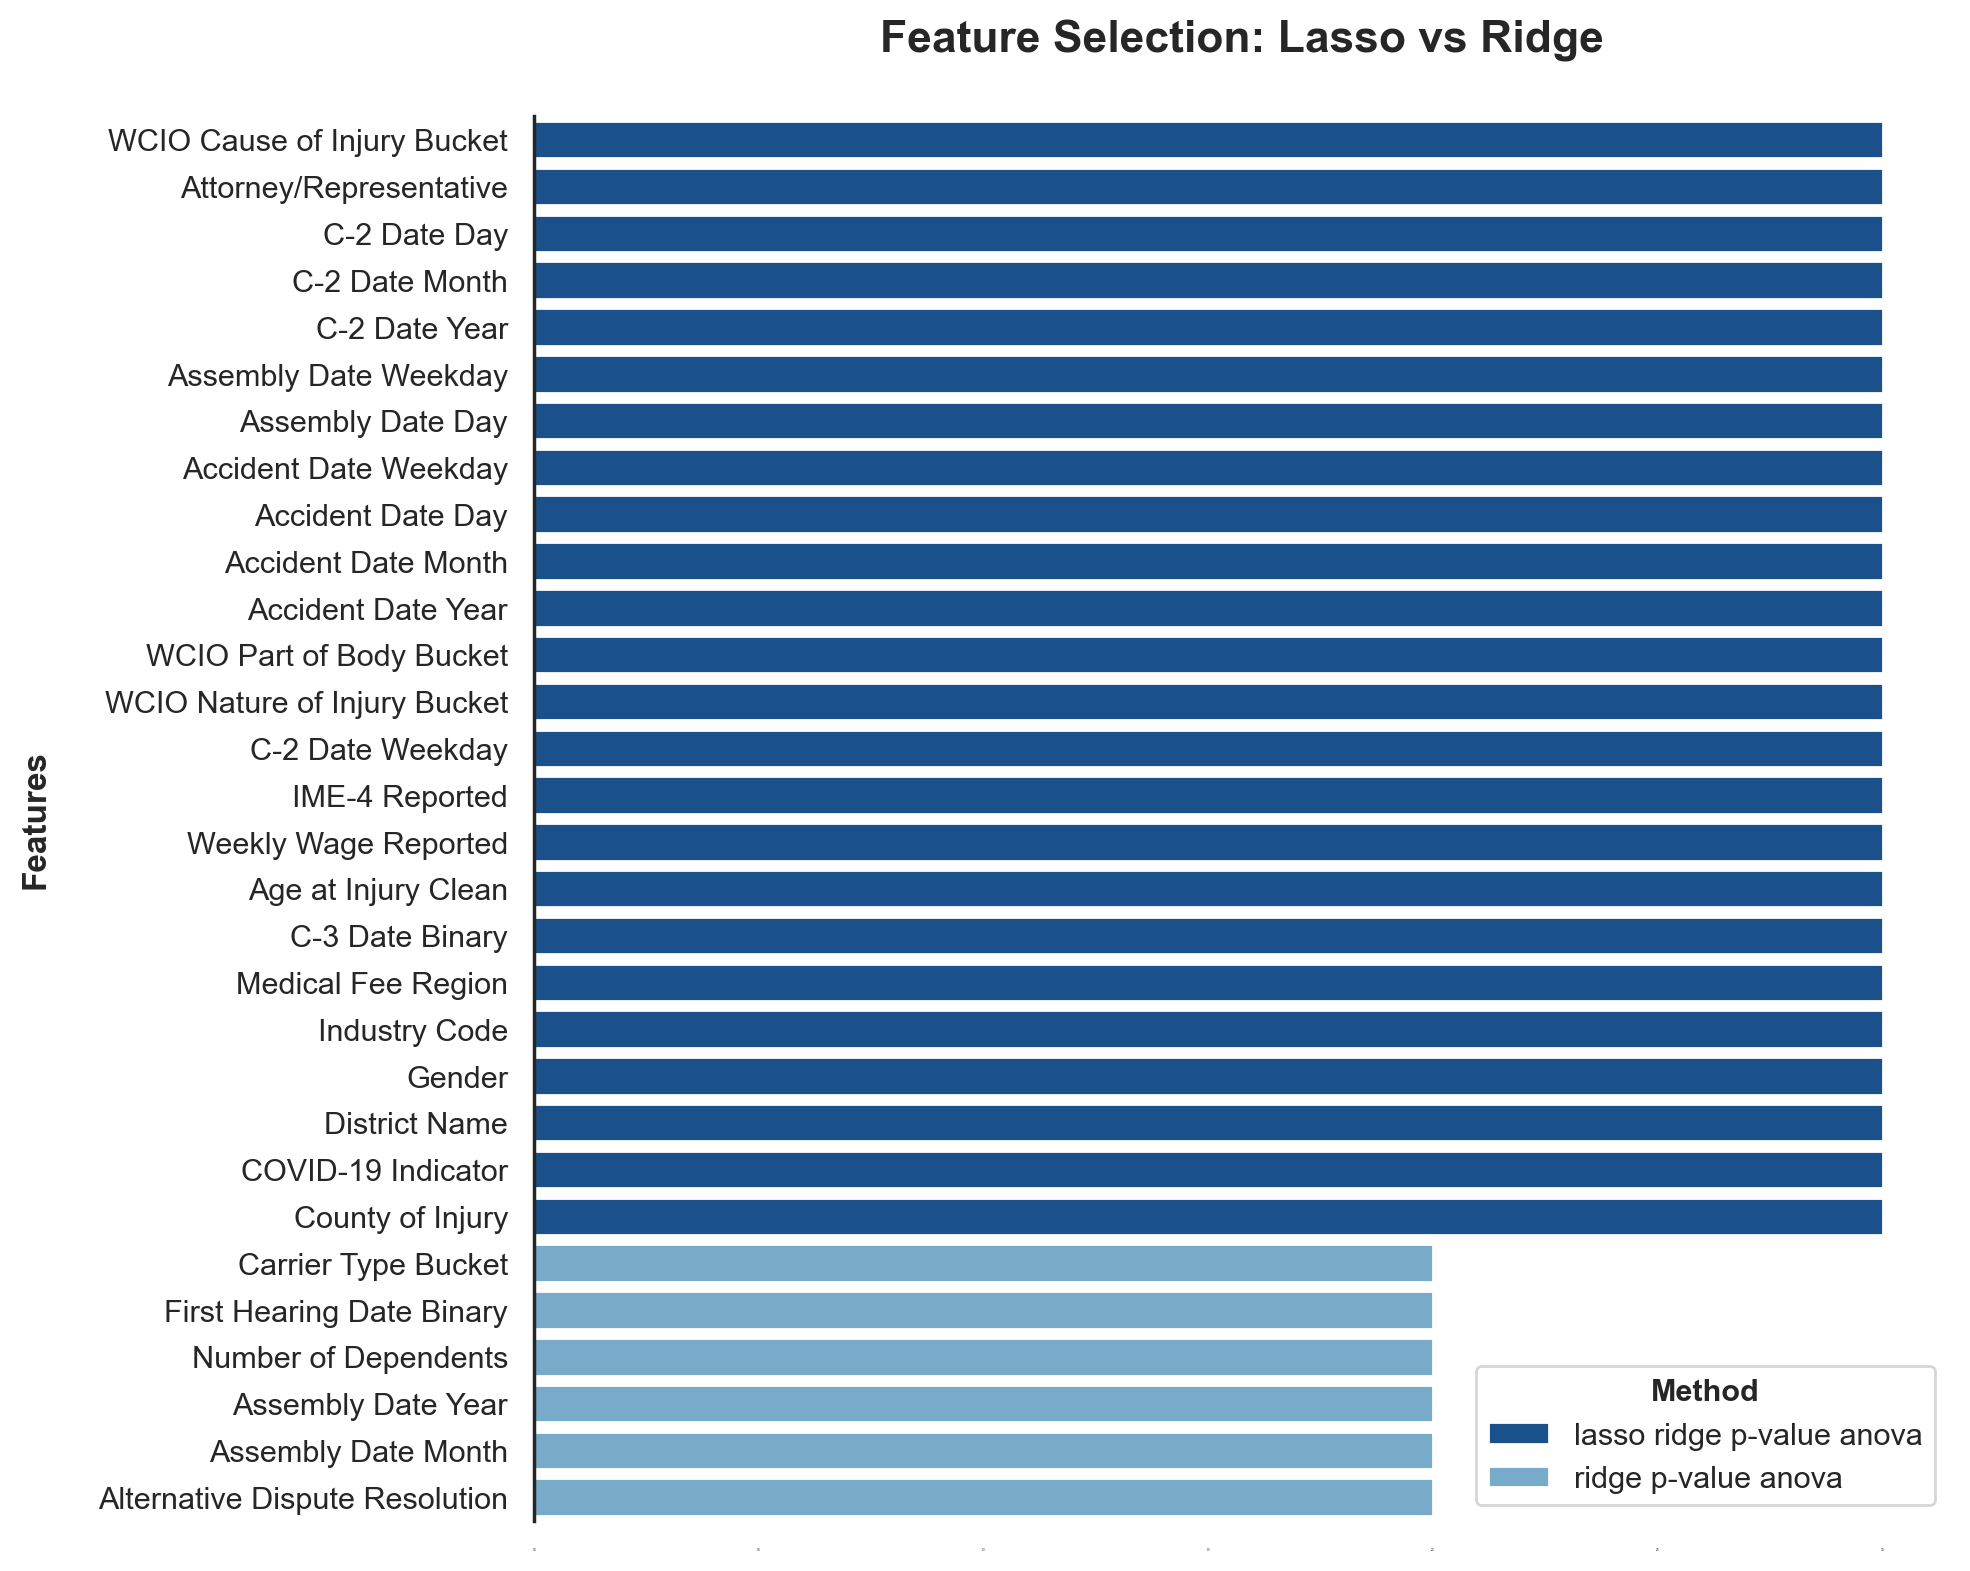

In [90]:
#################################################### Embedded Methods ####################################################
## 1. Lasso Regularization
## 2. Ridge Regularization
## 3. Linear Regression - compare simple logistic regressions and compare p-value (or Anova) [EXTRA]

# ---------------------------------------------- Ordinal Encoding ----------------------------------------------
# Assign the features to the X and y variables for the Lasso and Ridge Regularization
X = X_train_ordinal_encoded.values
y = y_train_encoded.values

# Feature names
feature_names = X_train_ordinal_encoded.columns

## Lasso Regularization
lasso = LassoCV(cv=5).fit(X, y)
lasso_selected_features = feature_names[lasso.coef_ != 0]

## Ridge Regularization
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5).fit(X, y)
ridge_selected_features = feature_names[ridge.coef_ != 0]

## Anova
selector = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=len(feature_names)).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## plot
dtf_features = pd.DataFrame({"features": feature_names})
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)

dtf_features["ridge"] = dtf_features["features"].apply(lambda x: "ridge" if x in ridge_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in ridge_selected_features else 0)

dtf_features["anova"] = dtf_features["features"].apply(lambda x: "p-value anova" if x in anova_selected_features else "")
dtf_features["num3"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)

dtf_features["method"] = dtf_features[["lasso", "ridge", "anova"]].apply(lambda x: (x[0] + " " + x[1] + " " + x[2]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"] + dtf_features["num3"]

# plot
plt.figure(figsize=(10, 8))
sns.barplot(y="features", x="selection", hue="method", 
            data=dtf_features.sort_values("selection", ascending=False), dodge=False,
            palette={"lasso": "#6BAED6", "ridge": "#3182BD", "ridge p-value anova": "#6BAED6", "p-value anova": "lightgrey", 'lasso ridge p-value anova':'#08519C'})

plt.title('Feature Selection: Lasso vs Ridge\n', fontsize=16, fontweight='bold')
plt.ylabel('Features\n', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.xticks(fontsize=0)
plt.legend(title="Method", fontsize='11', title_fontproperties={'weight':'bold', 'size':'11'})
sns.despine(top=True, right=True, bottom=True)
plt.tight_layout()
plt.show()

## darkblue bars - variables selected by Lasso, Ridge and p-value Anova 
## lightblue bars - variables selected by Ridge and p-value Anova

In [87]:
# Dataframe with the results
dtf_features.set_index('features').sort_index()

# Save the results of the feature selection on Excel file - Ordinal Encoding
dtf_features.set_index('features').sort_index().to_excel('./[ML]_Project_EDAOutputs_Group33/Feature_Selection_Results_OrdinalEncoding.xlsx')

lasso  num1  ridge  num2          anova  num3  \
features                                                                        
Accident Date Day               lasso     1  ridge     1  p-value anova     1   
Accident Date Month             lasso     1  ridge     1  p-value anova     1   
Accident Date Weekday           lasso     1  ridge     1  p-value anova     1   
Accident Date Year              lasso     1  ridge     1  p-value anova     1   
Age at Injury Clean             lasso     1  ridge     1  p-value anova     1   
Alternative Dispute Resolution            0  ridge     1  p-value anova     1   
Assembly Date Day               lasso     1  ridge     1  p-value anova     1   
Assembly Date Month                       0  ridge     1  p-value anova     1   
Assembly Date Weekday           lasso     1  ridge     1  p-value anova     1   
Assembly Date Year                        0  ridge     1  p-value anova     1   
Attorney/Representative         lasso     1  ridge     1  p-value anova     1   
C-2 Date Day                    lasso     1  ridge     1  p-value anova     1   
C-2 Date Month                  lasso     1  ridge     1  p-value anova     1   
C-2 Date Weekday                lasso     1  ridge     1  p-value anova     1   
C-2 Date Year                   lasso     1  ridge     1  p-value anova     1   
C-3 Date Binary                 lasso     1  ridge     1  p-value anova     1   
COVID-19 Indicator              lasso     1  ridge     1  p-value anova     1   
Carrier Type Bucket                       0  ridge     1  p-value anova     1   
County of Injury                lasso     1  ridge     1  p-value anova     1   
District Name                   lasso     1  ridge     1  p-value anova     1   
First Hearing Date Binary                 0  ridge     1  p-value anova     1   
Gender                          lasso     1  ridge     1  p-value anova     1   
IME-4 Reported                  lasso     1  ridge     1  p-value anova     1   
Industry Code                   lasso     1  ridge     1  p-value anova     1   
Medical Fee Region              lasso     1  ridge     1  p-value anova     1   
Number of Dependents                      0  ridge     1  p-value anova     1   
WCIO Cause of Injury Bucket     lasso     1  ridge     1  p-value anova     1   
WCIO Nature of Injury Bucket    lasso     1  ridge     1  p-value anova     1   
WCIO Part of Body Bucket        lasso     1  ridge     1  p-value anova     1   
Weekly Wage Reported            lasso     1  ridge     1  p-value anova     1   

                                                   method  selection  
features                                                              
Accident Date Day               lasso ridge p-value anova          3  
Accident Date Month             lasso ridge p-value anova          3  
Accident Date Weekday           lasso ridge p-value anova          3  
Accident Date Year              lasso ridge p-value anova          3  
Age at Injury Clean             lasso ridge p-value anova          3  
Alternative Dispute Resolution        ridge p-value anova          2  
Assembly Date Day               lasso ridge p-value anova          3  
Assembly Date Month                   ridge p-value anova          2  
Assembly Date Weekday           lasso ridge p-value anova          3  
Assembly Date Year                    ridge p-value anova          2  
Attorney/Representative         lasso ridge p-value anova          3  
C-2 Date Day                    lasso ridge p-value anova          3  
C-2 Date Month                  lasso ridge p-value anova          3  
C-2 Date Weekday                lasso ridge p-value anova          3  
C-2 Date Year                   lasso ridge p-value anova          3  
C-3 Date Binary                 lasso ridge p-value anova          3  
COVID-19 Indicator              lasso ridge p-value anova          3  
Carrier Type Bucket                   ridge p-value anova          2  
County of Injury   

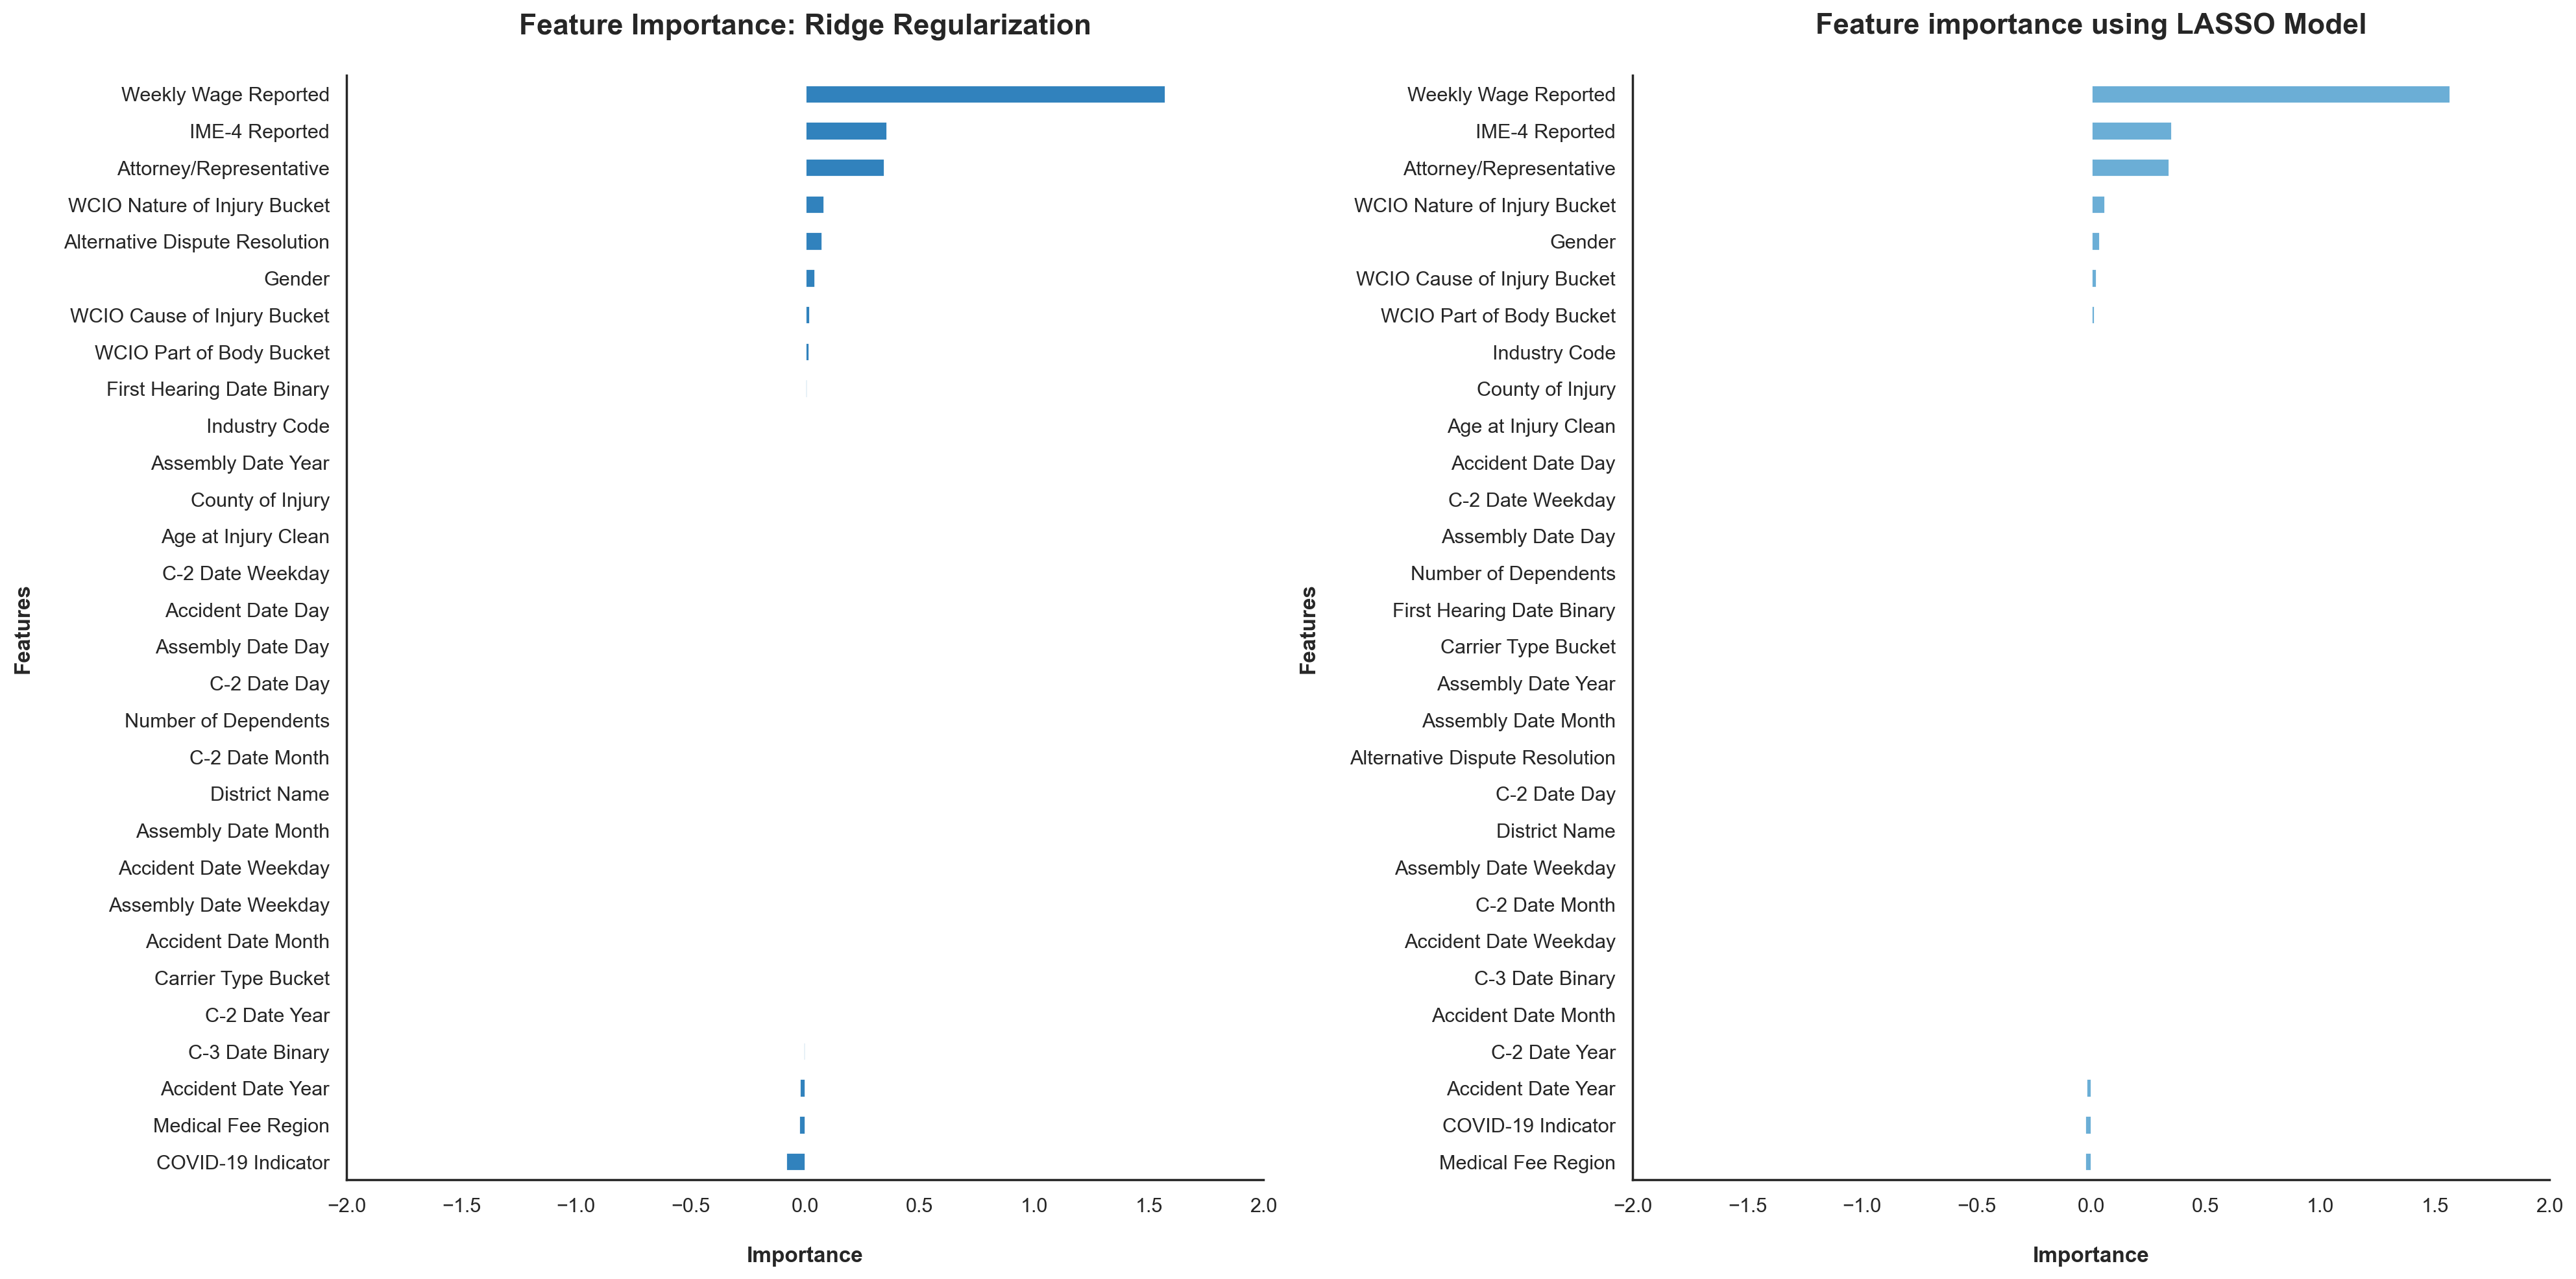

In [79]:
# Plot the importance of the features - Ridge Regularization & Lasso Regularization 
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Assign the features to the X and y variables for the Ridge Regularization
ridge_coef = pd.Series(ridge.coef_, index = feature_names)
ridge_import_coef = ridge_coef.sort_values(ascending=True)

# Plot the feature importance
ridge_import_coef.plot(kind='barh', color='#3182BD', ax=ax[0])
ax[0].set_title('Feature Importance: Ridge Regularization\n', fontsize=16, fontweight='bold')
ax[0].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Features\n', fontsize=12, fontweight='bold')
ax[0].set_xlim(-2, 2)

# Assign the features to the X and y variables for the Lasso Regularization
lasso_coef = pd.Series(lasso.coef_, index=feature_names)
lasso_imp_coef = lasso_coef.sort_values(ascending=True)

# Plot the importance of the features
lasso_imp_coef.plot(kind='barh', color='#6BAED6', ax=ax[1])
ax[1].set_xlim(-2, 2)
ax[1].set_title("Feature importance using LASSO Model\n", fontsize=16, fontweight='bold')
ax[1].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Features\n', fontsize=12, fontweight='bold')

sns.despine(top=True, right=True)
plt.tight_layout()
# fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureImportance_Ridge_Lasso.png', dpi=300, bbox_inches='tight')
plt.show()

----

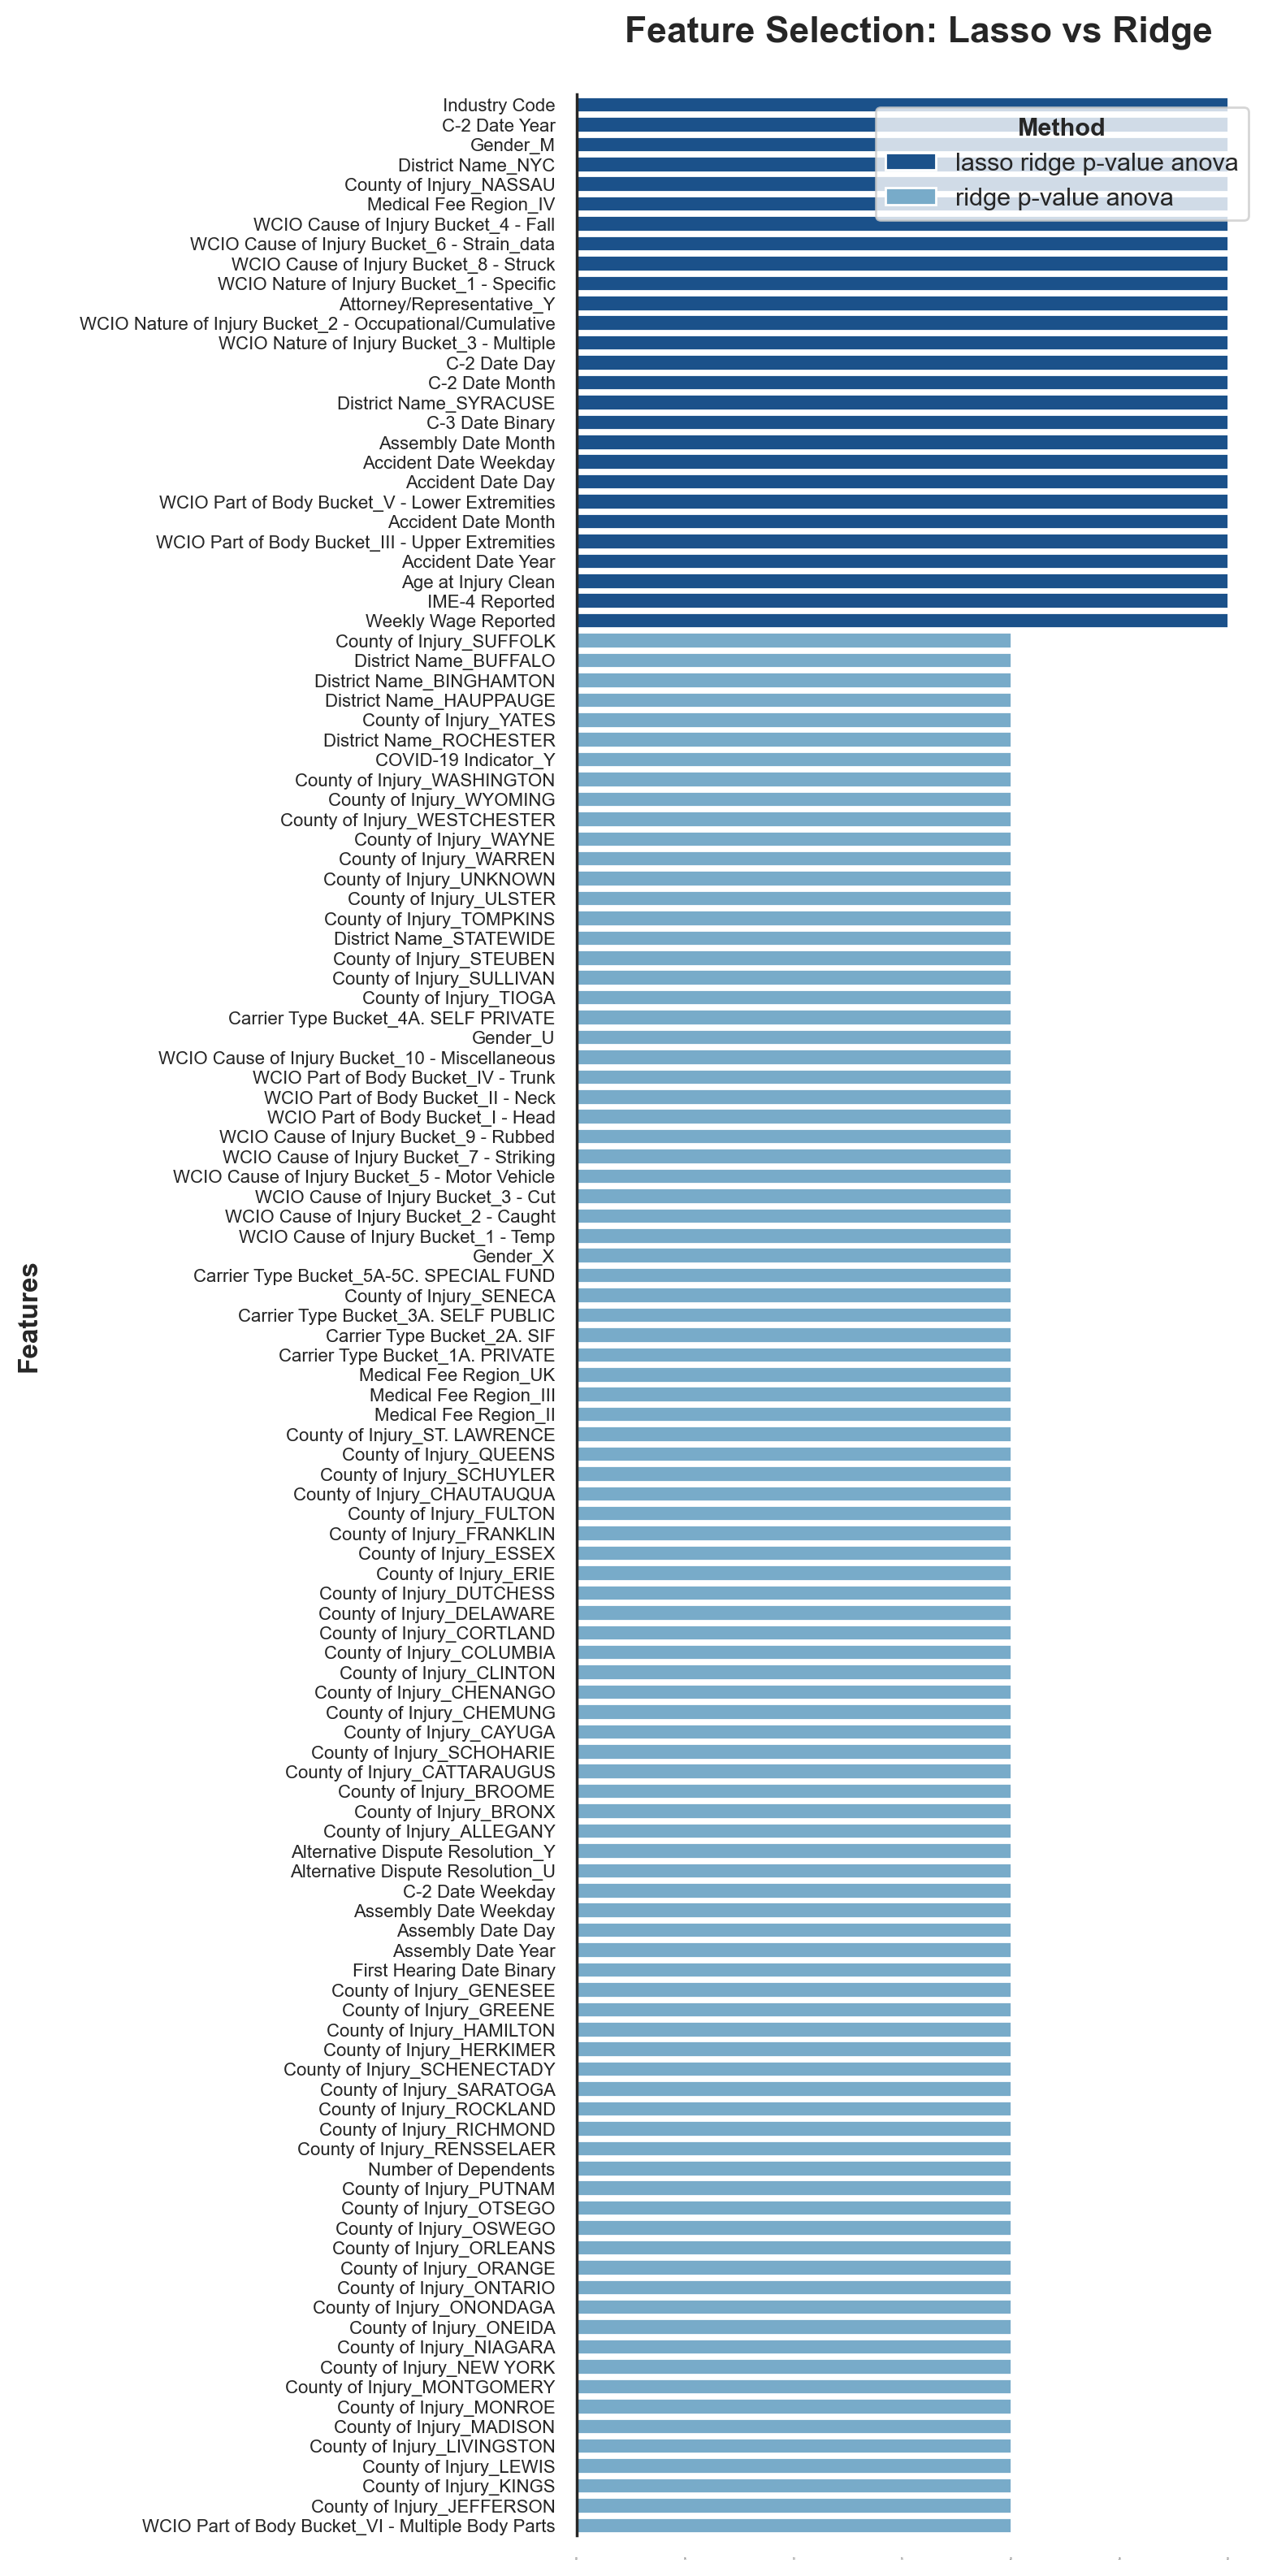

In [ ]:
# ---------------------------------------------- One-Hot Encoding ----------------------------------------------
# # Assign the features to the X and y variables for the Lasso and Ridge Regularization
X = X_train_ohe.values
y = y_train_encoded.values

# Feature names
feature_names = X_train_ohe.columns

## Lasso Regularization
lasso = LassoCV(cv=5).fit(X, y)
lasso_selected_features = feature_names[lasso.coef_ != 0]

## Ridge Regularization
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5).fit(X, y)
ridge_selected_features = feature_names[ridge.coef_ != 0]

## Anova
selector = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=len(feature_names)).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## plot
dtf_features = pd.DataFrame({"features": feature_names})
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)

dtf_features["ridge"] = dtf_features["features"].apply(lambda x: "ridge" if x in ridge_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in ridge_selected_features else 0)

dtf_features["anova"] = dtf_features["features"].apply(lambda x: "p-value anova" if x in anova_selected_features else "")
dtf_features["num3"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)

dtf_features["method"] = dtf_features[["lasso", "ridge", "anova"]].apply(lambda x: (x[0] + " " + x[1] + " " + x[2]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"] + dtf_features["num3"]

# plot
plt.figure(figsize=(8, 16))
sns.barplot(y="features", x="selection", hue="method", 
            data=dtf_features.sort_values("selection", ascending=False), dodge=False,
            palette={"lasso": "#6BAED6", "ridge": "#3182BD", "ridge p-value anova": 
                     "#6BAED6", "p-value anova": "lightgrey", 'lasso ridge p-value anova':'#08519C'})

plt.title('Feature Selection: Lasso vs Ridge\n', fontsize=16, fontweight='bold')
plt.ylabel('Features\n', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.xticks(fontsize=0)
plt.yticks(fontsize=8)
plt.legend(title="Method", fontsize='11', title_fontproperties={'weight':'bold', 'size':'11'})
sns.despine(top=True, right=True, bottom=True)
plt.tight_layout()
plt.show()

## darkblue bars - variables selected by Lasso, Ridge and p-value Anova 
## lightblue bars - variables selected by Ridge and p-value Anova

In [7]:
# Dataframe with the results
dtf_features.set_index('features').sort_index()

# Save the results of the feature selection on Excel file - One-Hot Encoding
dtf_features.set_index('features').sort_index().to_excel('./[ML]_Project_EDAOutputs_Group33/Feature_Selection_Results_OneHotEncoding.xlsx')

lasso  num1  ridge  num2  \
features                                                                      
Accident Date Day                                  lasso     1  ridge     1   
Accident Date Month                                lasso     1  ridge     1   
Accident Date Weekday                              lasso     1  ridge     1   
Accident Date Year                                 lasso     1  ridge     1   
Age at Injury Clean                                lasso     1  ridge     1   
...                                                  ...   ...    ...   ...   
WCIO Part of Body Bucket_III - Upper Extremities   lasso     1  ridge     1   
WCIO Part of Body Bucket_IV - Trunk                          0  ridge     1   
WCIO Part of Body Bucket_V - Lower Extremities     lasso     1  ridge     1   
WCIO Part of Body Bucket_VI - Multiple Body Parts            0  ridge     1   
Weekly Wage Reported                               lasso     1  ridge     1   

                                                           anova  num3  \
features                                                                 
Accident Date Day                                  p-value anova     1   
Accident Date Month                                p-value anova     1   
Accident Date Weekday                              p-value anova     1   
Accident Date Year                                 p-value anova     1   
Age at Injury Clean                                p-value anova     1   
...                                                          ...   ...   
WCIO Part of Body Bucket_III - Upper Extremities   p-value anova     1   
WCIO Part of Body Bucket_IV - Trunk                p-value anova     1   
WCIO Part of Body Bucket_V - Lower Extremities     p-value anova     1   
WCIO Part of Body Bucket_VI - Multiple Body Parts  p-value anova     1   
Weekly Wage Reported                               p-value anova     1   

                                                                      method  \
features                                                                       
Accident Date Day                                  lasso ridge p-value anova   
Accident Date Month                                lasso ridge p-value anova   
Accident Date Weekday                              lasso ridge p-value anova   
Accident Date Year                                 lasso ridge p-value anova   
Age at Injury Clean                                lasso ridge p-value anova   
...                                                                      ...   
WCIO Part of Body Bucket_III - Upper Extremities   lasso ridge p-value anova   
WCIO Part of Body Bucket_IV - Trunk                      ridge p-value anova   
WCIO Part of Body Bucket_V - Lower Extremities     lasso ridge p-value anova   
WCIO Part of Body Bucket_VI - Multiple Body Parts        ridge p-value anova   
Weekly Wage Reported                               lasso ridge p-value anova   

                                                   selection  
features                                                      
Accident Date Day                                          3  
Accident Date Month                                        3  
Accident Date Weekday                                      3  
Accident Date Year                                         3  
Age at Injury Clean                                        3  
...                                                      ...  
WCIO Part of Body Bucket_III - Upper Extremities           3  
WCIO Part of Body Bucket_IV - Trunk                        2  
WCIO Part of Body Bucket_V - Lower Extremities             3  
WCIO Part of Body Bucket_VI - Multiple Body Parts          2  
Weekly Wage Reported                                       3  

[123 rows x 8 columns]

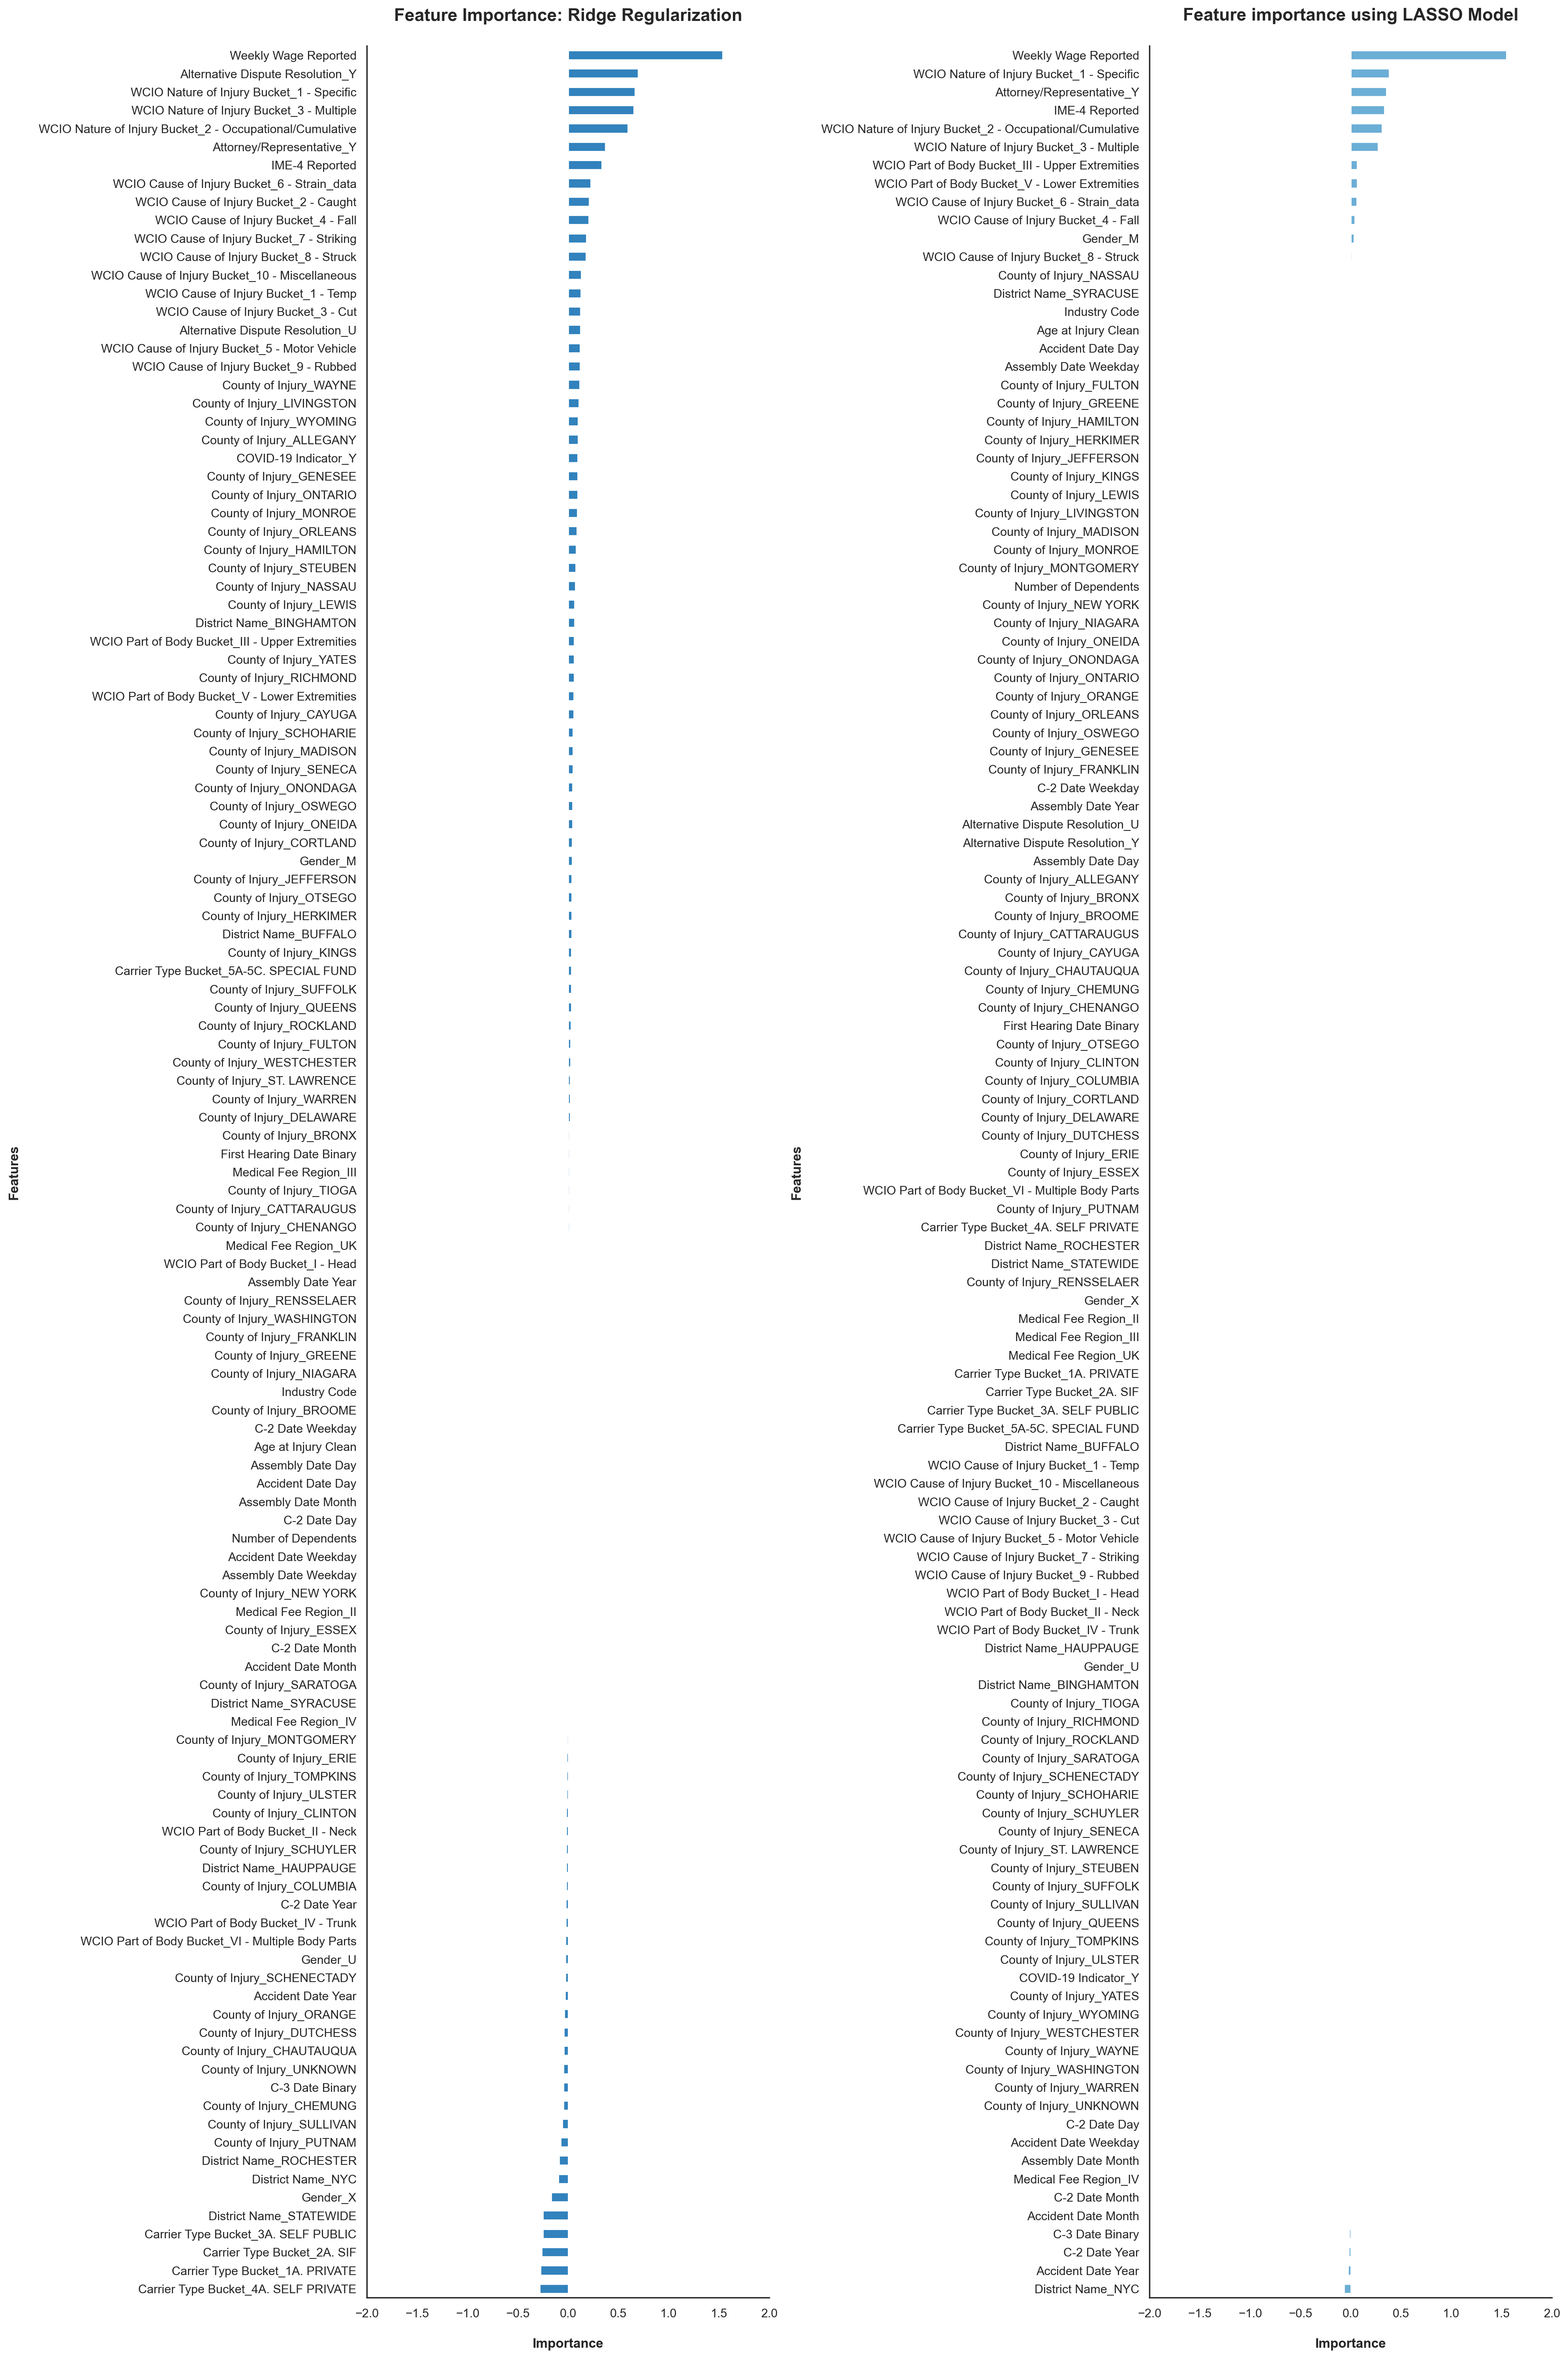

In [14]:
# Plot the importance of the features - Ridge Regularization & Lasso Regularization 
fig, ax = plt.subplots(1, 2, figsize=(20, 30))

# Assign the features to the X and y variables for the Ridge Regularization
ridge_coef = pd.Series(ridge.coef_, index = feature_names)
ridge_import_coef = ridge_coef.sort_values(ascending=True)

# Plot the feature importance
ridge_import_coef.plot(kind='barh', color='#3182BD', ax=ax[0])
ax[0].set_title('Feature Importance: Ridge Regularization\n', fontsize=16, fontweight='bold')
ax[0].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Features\n', fontsize=12, fontweight='bold')
ax[0].set_xlim(-2, 2)

# Assign the features to the X and y variables for the Lasso Regularization
lasso_coef = pd.Series(lasso.coef_, index=feature_names)
lasso_imp_coef = lasso_coef.sort_values(ascending=True)

# Plot the importance of the features
lasso_imp_coef.plot(kind='barh', color='#6BAED6', ax=ax[1])
ax[1].set_xlim(-2, 2)
ax[1].set_title("Feature importance using LASSO Model\n", fontsize=16, fontweight='bold')
ax[1].set_xlabel('\nImportance', fontsize=12, fontweight='bold')
ax[1].set_ylabel('Features\n', fontsize=12, fontweight='bold')

sns.despine(top=True, right=True)
plt.tight_layout()
# fig.savefig('./[ML]_Project_EDAOutputs_Group33/FeatureImportance_Ridge_Lasso.png', dpi=300, bbox_inches='tight')
plt.show()

----

#### **Feature Selection | Key Notes**

##### **Numerical Data Summary**

| Predictor               | Correlation | Ridge        | Lasso        | RFE          | Multicollinearity? | What to do?              |
|-------------------------|-------------|--------------|--------------|--------------|--------------------|--------------------------|
| Weekly Wage Reported    | High        | Selected     | Selected     | Selected     | No                 | **Include in model**     |
| IME-4 Reported          | Moderate    | Selected     | Selected     | Not Selected | Yes?               | **Try with and without** |
| Attorney/Representative | Low         | Selected     | Selected     | Not Selected | No                 | Consider including       |
| Age at Injury Clean     | Moderate    | Not Selected | Selected     | Not Selected | Yes?               | **Try with and without** |
| Number of Dependents    | Low         | Not Selected | Not Selected | Not Selected | No                 | Discard                  |
| C-3 Date Binary         | Low         | Not Selected | Not Selected | Not Selected | No                 | Discard                  |
| Assembly Date Year      | High        | Not Selected | Not Selected | Not Selected | Yes?               | Discard                  |
| Accident Date Day       | Low         | Not Selected | Not Selected | Not Selected | No                 | Discard                  |

<br>

> **`?`** - The variable is correlated with other variables, but it is not clear if it should be kept or not. (Multicollinearity Problem) <BR>
> **Note:** Variables with low or no selection across methods can likely be discarded to improve model efficiency.

---

##### **Categorical Data Summary**

| Predictor                      | Chi-Square | Ridge        | Lasso        | RFE          | Multicollinearity? | What to do?              |
|--------------------------------|------------|--------------|--------------|--------------|--------------------|--------------------------|
| Alternative Dispute Resolution | High       | Selected     | Not Selected | Not Selected | No                 | **Consider including**   |
| WCIO Cause of Injury Bucket    | Moderate   | Selected     | Selected     | Not Selected | Yes?               | Include in model         |
| Gender                         | High       | Selected     | Selected     | Not Selected | No                 | **Consider including**   |
| WCIO Nature of Injury Bucket   | Moderate   | Selected     | Selected     | Not Selected | Yes?               | **Try with and without** |
| COVID-19 Indicator             | Low        | Not Selected | Not Selected | Not Selected | No                 | Discard                  |
| District Name                  | Low        | Not Selected | Not Selected | Not Selected | No                 | Discard                  |
| Industry Code                  | Moderate   | Selected     | Selected     | Not Selected | Yes?               | **Try with and without** |
| Carrier Type Bucket            | Moderate   | Not Selected | Not Selected | Not Selected | No                 | Discard                  |

<br>

> **Interpretation:** Categorical features with significant Chi-Square values are likely important for model predictions, but those not selected by Ridge, Lasso, or RFE can be discarded.

---

##### Feature Selection Summary for Both Numerical and Categorical Variables

- **Features Selected by Lasso:** Weekly Wage Reported, IME-4 Reported, Attorney/Representative, Gender, WCIO Cause of Injury Bucket.
- **Features Selected by Ridge:** Weekly Wage Reported, IME-4 Reported, Attorney/Representative, Alternative Dispute Resolution.
- **Features Selected by RFE:** Weekly Wage Reported.

**Observations:**

- **Weekly Wage Reported** remains a strong candidate, as it was consistently selected across all methods and does not have multicollinearity concerns.
- Variables with **potential multicollinearity**, like **IME-4 Reported**, **WCIO Cause of Injury Bucket**, and **Industry Code**, may need further review or adjustments (e.g., variable transformations or regularization) if included.

<div class="alert alert-block alert-danger" style="font-weight: bold; font-size: 45px;">

FINISH AND CONFIRM THIS SECTION (Just a ChatGPT output)

</div>

---

# 💾 Save Data 

In [144]:
# # Save the training and validation sets
# X_train.to_parquet('data/2ndNotebook/X_train.parquet', engine='fastparquet')
# X_val.to_parquet('data/2ndNotebook/X_val.parquet', engine='fastparquet')
# y_train.to_frame().to_parquet('data/2ndNotebook/y_train.parquet', engine='fastparquet')
# y_val.to_frame().to_parquet('data/2ndNotebook/y_val.parquet', engine='fastparquet')

# # Save the test set
# test_data.to_parquet('data/2ndNotebook/test_data.parquet', engine='fastparquet')

---

# 🔗 Bibliography/References

**[[1]](https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering)** Koehrsten, Will. (2022), "Introduction to Manual Feature Engineering." https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering

**[[2]](https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6)** Poon, Wing. (2022), "Feature Engineering for Machine Learning (1/3)." Medium. https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6

**[[3]](https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable)** Stack Exchange. (2022), "OneHotEncoding Target Variable." https://datascience.stackexchange.com/questions/87542/onehotencoding-target-variable

**[4]** XXXXXXXXXXX